# Capstone: TMDB Box Office Prediction
**_Author: Despina Daisy Matos_**

## Table of Contents: 
- [Libraries](#Libraries)
- [Outside Research](#Outside-Research)
- [Data Cleaning](#Data-Cleaning)
    - [Reading In The Datasets](#Reading-In-The-Datasets)
    - [Dropping Unrelated Features](#Dropping-Unrelated-Features)
    - [Dealing with Missing Values](#Dealing-with-Missing-Values)
    - [Fixing Datetime](#Fixing-Datetime)
    - [Extracting Data](#Extracting-Data)
        - [From `genres`](#From-genres)
        - [From `production_companies`](#From-production_companies)
        - [From `production_countries`](#From-production_countries)
        - [From `spoken_languages`](#From-spoken_languages)
        - [From `Keywords`](#From-Keywords)
        - [From `crew`](#From-crew)
    - [Creating Binary Features](#Creating-Binary-Features)
        - [Regulate `production_companies` Binary Features](#Regulate-production_companies-Binary-Features)
        - [Regulate `Keywords` Binary Features](#Regulate-Keywords-Binary-Features)
    - [Mapping `original_language` Feature](#Mapping-original_language-Feature)
    - [Exporting Cleaned Datasets](#Exporting-Cleaned-Datasets)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Summary Statistics](#Summary-Statistics)
    - [Investigating Target Variable `revenue`](#Investigating-Target-Variable-revenue)
    - [Investigating Selected Univariate Distributions](#Investigating-Selected-Univariate-Distributions)
    - [Investigating Correlations](#Investigating-Correlations)
    - [Investigating Binary Features Frequencies](#Investigating-Binary-Features-Frequencies)
    - [Investigating Datetime Features](#Investigating-Datetime-Features)
    - [Outliers](#Outliers)
- [Preprocessing](#Preprocessing)
    - [Feature Engineering](#Feature-Engineering)
    - [Setting The Features Equal](#Setting-The-Features-Equal)
    - [Creating X features and y](#Creating-X-features-and-y)
    - [Train-test Split](#Train-test-Split)
    - [Scaling The Data](#Scaling-The-Data)
    - [Determing the Baseline Score](#Determing-the-Baseline-Score)
- [Modeling](#Modeling)
    - [Linear Regression](#Linear-Regression)
    - [Ridge Regression](#Ridge-Regression)
    - [Lasso Regression](#Lasso-Regression)
    - [DecisionTreeRegressor](#DecisionTreeRegressor)
    - [BaggingRegressor](#BaggingRegressor)
    - [RandomForestRegressor](#RandomForestRegressor)
    - [AdaBoostRegressor](#AdaBoostRegressor)
    - [GradientBoostingRegressor](#GradientBoostingRegressor)
    - [SVR](#SVR)
    - [VotingRegressor](#VotingRegressor)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)
- [Sources](#Sources)

## Libraries

Lets begin by importing our libraries that we will be working with throughout this Data Science Process.

In [1]:
# Working in the datasets
import pandas as pd

# Extracting features
import ast

# Scientific computing
import numpy as np

# Plotting for EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, \
                             AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

Now that we have successfully loaded in our libraries, we can explore some outside research on our particular topic.

## Outside Research

On [The Movie Database](https://www.themoviedb.org/) website, Moive Seekers can gain a lot of information about Moives and TV shows. If we want to gain access to details about a particular Movie, we can either click on the Movie's poster or search it up on the website's database. Once we have access to a particular Movie, we are able to see the title, poster, user score, overview, full cast & crew, status, original language, runtime, budget, genres, key words, content score, and revenue if already released. Also, we are able see reviews and create discussions about this particular Movie. In other words, it is a Movie Lovers dream. With that in mind, most of these factors can help us with determining how much money a Movie will make after it is out in the Box Office. 

To emphasize, according to [Movies: What determines the success of a movie (by box office revenue)?](https://www.quora.com/Movies-What-determines-the-success-of-a-movie-by-box-office-revenue), many factors can determine the Box Office success of a film such as the popularity of the film's content, the current popularity of the film's genre, the current popularity of the film's stars, the strength of the film's marketing campaign, and the strength of the film's distribution as well as its release schedule. As a result, popularity and budgeting seems like a key factor that influences the Movie's revenue. 

In addition, "Movies: What determines the success of a movie (by box office revenue)?" states that factors such as weather, holidays, distracting news events can limit the film's audience during the critical opening weekend. In that case, datetime seems like a key factor that also influences the Movie's revenue.

Also, "Movies: What determines the success of a movie (by box office revenue)?" states awareness of the film based upon it being adapted from a popular book or news story. For this reason, genres seem like a key factor that also influences the Movie's revenue. 

Lastly, according to [Study explores what really makes a movie successful](https://phys.org/news/2017-11-explores-movie-successful.html), a key determinant of Box Office success is the number of screens where the Movie is released. Thus, Movie production companies need to budget for their advertisement as well. In this case, does the production company have enough money to sell to these locations where movies are being shown or enough for advertising? For this reason, production companies seem like a key factor that also influence the Movie's revenue. 

We will use this research to assist us on understanding our data fully. 

Now, lets begin our Data Science Process by importing our datasets and then, shape it to answer our problem statement.

## Data Cleaning

[Back to Top](#Table-of-Contents:) 

We have been given two datasets, training and testing. In the training dataset, it has selected features with the target variable. In the testing dataset, it has the same selected features as training but does not have the target variable. Due to, our training dataset will need to be fitted on our testing dataset to be able to evaluate our model. 

We will begin by dropping unrelated features, dealing with missing values, fixing datatypes, and extracting data from specific features. Afterwards, we will create binary features for the categorical data and map selected features to a numerical format. Finally, we will save our cleaned datasets for future use. At the end of this section, we will able to determine the appropriate features in both datasets for modeling.

### Reading In The Datasets

[Back to Top](#Table-of-Contents:) 

Lets import in both of our datasets. We will import the training dataset first.

*Train Dataset*

In [2]:
# Loading in the train dataset
train = pd.read_csv('./data/train.csv')
# Check to see if it worked
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


We successfully loaded in the training dataset. Next, lets check the size of the training dataset.

In [3]:
# Checking the shape
train.shape

(3000, 23)

The training dataset has 23 features and each feature has 3,000 rows of movies. This dataset has the target variable: `revenue`. We can now import in the testing dataset.

*Test Dataset*

In [4]:
# Loading in the test dataset
test = pd.read_csv('./data/test.csv')
# Check to see if it worked
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


We also successfully loaded in the testing dataset. Lets also check the size of the testing dataset.

In [5]:
# Checking the shape
test.shape

(4398, 22)

The testing dataset has 22 features and each feature has 4,398 rows of movies. We can now begin our data cleaning. We should first drop unrelated features in both datasets.

### Dropping Unrelated Features

[Back to Top](#Table-of-Contents:) 

We will drop features that do not correlate with answering our problem statement. In other words, we will select these features by exploring each datasets' columns and referencing the [data dictionary](https://www.kaggle.com/c/tmdb-box-office-prediction/data). After selecting these features, we will use a function to drop these features from both datasets. 

In [6]:
# Checking the features in the train dataset
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [7]:
# Checking the features in the test dataset
test.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')

In the both datasets, we will drop the `id`, `belongs_to_collection`, `homepage`, `imdb_id`, `overview`, `poster_path`, `tagline`, and `cast` features. 

We will drop the `id` feature because it is the id for the dataset which is not very useful for us. We will drop the `belongs_to_collection` feature because not all movies are in a franchise. We will drop the `homepage` feature because it is a website to the movie's homepage which again is not very useful for us. We will drop the `imdb_id` feature because it is the id for the [IMDB website](https://www.imdb.com/) which again is not very useful for us. We will drop the `overview` feature because it is the summary of a Movie and we are producing a Regression model not a NLP model. We will drop the `poster_path` because we do not need images and again, we are producing a Regression model not a Neural Networks model. We will drop the `tagline` feature because it shows the famous Movie lines from the Movie and like the `overview` feature it will not be useful for our modeling. Lastly, we will drop the `cast` feature because if we will wanted to create binary features, we will clog our datasets which will make our models have high variance.

Lets create our helper function now to drop these features.

In [8]:
# Dropping unrelated features from datasets
def dropping_unrelated_features(df):
    df = df.drop(columns = [
    'id',
    'belongs_to_collection',
    'homepage',
    'imdb_id',
    'overview',
    'poster_path',
    'tagline',
    'cast'
])
    return df

Now, lets implement this function on both datasets. We will start with the training dataset.

*Train Dataset*

In [9]:
# Dropping selected features
train = dropping_unrelated_features(train)

# Check to see if it worked 
train.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'title', 'Keywords', 'crew',
       'revenue'],
      dtype='object')

We successfully dropped these selected features from our training dataset. Next, lets drop the same features from the testing dataset.

*Test Dataset*

In [10]:
# Dropping selected features
test = dropping_unrelated_features(test)

# Check to see if it worked 
test.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'title', 'Keywords', 'crew'],
      dtype='object')

We also successfully dropped these selected features from our testing dataset. 

In our next part, we will check for missing and zero values in both datasets and decide what to do with them.

### Dealing with Missing Values

[Back to Top](#Table-of-Contents:) 

Missing data is defined by values that are either NaN or nulls in the data. We will check each dataset of these values and then only drop these values in the training dataset. We do this because the training dataset is fitted on our testing dataset so we can not drop rows in our testing dataset. 

We will start with the training dataset.

*Train Dataset*

In [11]:
# Checking for nulls in the train dataset
train.isnull().sum()

budget                    0
genres                    7
original_language         0
original_title            0
popularity                0
production_companies    156
production_countries     55
release_date              0
runtime                   2
spoken_languages         20
status                    0
title                     0
Keywords                276
crew                     16
revenue                   0
dtype: int64

There is missing data in the training dataset. We decide to drop these null values because the data will not be effected in the slightest if these values will be dropped. To put it differently, our missing values is about 10 percent of our overall dataset, so dropping it will not make a difference. Lets drop it now. 

In [12]:
# Dropping the nulls in the train dataset
train = train.dropna()

# Checking to see if it worked
train.shape

(2609, 15)

We now have 2,609 rows of Movies in our training dataset. Next, lets check the testing dataset.

*Test Dataset*

In [13]:
# Checking for nulls the test dataset 
test.isnull().sum()

budget                    0
genres                   16
original_language         0
original_title            0
popularity                0
production_companies    258
production_countries    102
release_date              1
runtime                   4
spoken_languages         42
status                    2
title                     3
Keywords                393
crew                     22
dtype: int64

There is also missing data in the testing dataset. Again, the missing values are such a small amount from the overall data. Thus, we will keep it because we can not drop rows in the testing dataset.

In our next part, we will fix the `release_date` feature as a datetime datatype in both datasets.

### Fixing Datetime

[Back to Top](#Table-of-Contents:) 

We will change the datatype of the `release_date` feature in both datasets because it is a date in time and we might want to explore this feature later on. We will start with the training dataset.

*Train Dataset*

In [14]:
# Changing format into date object in train dataset
train.release_date = pd.to_datetime(train.release_date)

# Check to see if it worked
train.release_date.dtype

dtype('<M8[ns]')

We were able to successfully change the datatype in the training dataset. Now we can create new features such as `Month_release_date` and `Year_release_date` to add to our training dataset. This will be interesting to explore later on for trends. 

In [15]:
# Creating our month column
train['Month_release_date'] = train['release_date'].apply(lambda x: x.month)

# Creating our year column
train['Year_release_date'] = train['release_date'].apply(lambda x: x.year)

# Lets check to see if it worked 
train[['Month_release_date','Year_release_date']].head()

,Month_release_date,Year_release_date
0,2,2015
1,8,2004
2,10,2014
8,2,1996
9,4,2003


We successfully created these new features in our training dataset. Next, lets change it in the testing dataset.

*Test Dataset*

In [16]:
# Changing format into object in test dataset
test.release_date = pd.to_datetime(test.release_date)

# Check to see if it worked
test.release_date.dtype

dtype('<M8[ns]')

In [17]:
# Creating our month column
test['Month_release_date'] = test['release_date'].apply(lambda x: x.month)

# Creating our year column
test['Year_release_date'] = test['release_date'].apply(lambda x: x.year)

# Lets check to see if it worked 
test[['Month_release_date','Year_release_date']].head()

,Month_release_date,Year_release_date
0,7.0,2007.0
1,5.0,2058.0
2,5.0,1997.0
3,9.0,2010.0
4,2.0,2005.0


We were also able to successfully change the datatype and create the new features in the testing dataset. 

So in both datasets, 
- we dropped unrelated features 
- dealt with missing and zero values 
- changed the datatime feature to the correct datatype and created two new features: `Month_release_date` and `Year_release_date`

We will now transition into our next section of data cleaning: extracting data.

### Extracting Data

[Back to Top](#Table-of-Contents:) 

In both datasets, we have features that are in dictionary format. In other words, these features have keys and values. Thus, some of these keys in these features will be helpful for answering our problem statement. The features that we will select are the `genres`, `production_companies`, `production_countries`, `spoken_languages`, `Keywords`, and `crew` features. Once we get these keys, we will be able to add it into our datasets as features. Lets create helper functions that would extract the keys. 

First, we must change the strings into dictionaries. 

*Training Dataset*

In [18]:
# Reading the value as a dictionary instead of a string
def change_from_str_to_dict_in_train_df(df):
    df = df.apply(ast.literal_eval) 
    return df

We need a different function for the testing dataset because some of these features in this dataset have null values. 

*Testing Dataset*

In [19]:
# Reading the value as a dictionary instead of a string
# Collaborate with Noah C.
def change_from_str_to_dict_in_test_df(df):
    return [i if type(i) == float else ast.literal_eval(i) for i in df]

In [20]:
# Filling in float NaN values with lists 
# Collaborate with Ethan H.
def filling_floats_with_lists(df):
    return df.map(lambda x: [] if x is np.nan else x)

Then, we can extract the data.

In [21]:
# Extracting data from specific features' dictionaries
def extracting_data(df, value):
    values = []
    for item in df:
        output = ''
        for key in item:
            output += key[value]
            output += ','
        output = output[:-1]
        values.append(output)
    return values

Lets extract the data in the sequence of features stated in both datasets. We will begin with the `genres` feature.

#### From `genres`

[Back to Top](#Table-of-Contents:) 

We will determine various forms of categories or classifications or groups of films. We will start with extracting from the training dataset.

*Train Dataset*

In [22]:
# Check what the feature has
train.genres[2]

"[{'id': 18, 'name': 'Drama'}]"

In the `genres` feature, we have two keys in this dictionary: `id` and `name`. We decided to keep the `name` key and reassign the `genres` feature as such. Lets extract the data now.

In [23]:
# Extracting the name key from genre feature
train.genres = change_from_str_to_dict_in_train_df(train.genres)
train.genres = extracting_data(train.genres, 'name') 

# Check to see if it worked
train.genres.head()

0                                  Comedy
1             Comedy,Drama,Family,Romance
2                                   Drama
8    Action,Comedy,Music,Family,Adventure
9                            Comedy,Music
Name: genres, dtype: object

We were successfully able to extract the `name` values in the `genres` feature in the training dataset. Next, lets do the same for the testing dataset. 

*Test Dataset*

In [24]:
# Extracting name key from genre feature
test.genres = change_from_str_to_dict_in_test_df(test.genres)
test.genres = filling_floats_with_lists(test.genres)
test.genres = extracting_data(test.genres, 'name') 

# Check to see if it worked
test.genres.head()

0    Adventure,Animation,Family,Fantasy
1                Horror,Science Fiction
2                        Comedy,Romance
3                     Drama,War,Mystery
4                   History,Documentary
Name: genres, dtype: object

We were also successfully able to extract the `name` values in the `genres` feature in the testing dataset. Next, lets extract data from the `production_countries` feature.

#### From `production_companies`

[Back to Top](#Table-of-Contents:) 

We will be able to determine who pays for and creates a Movie. We will start with extracting from the training dataset.

*Train Dataset*

In [25]:
# Check what the feature has
train.production_companies[2]

"[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]"

In the `production_companies` feature we have two keys in this dictionary: `name` and `id`. We decided to keep the `name` key and reassign the `production_companies` feature as such. Lets extract the data now.

In [26]:
# Extracting name key from production_companies feature
train.production_companies = change_from_str_to_dict_in_train_df(train.production_companies)
train.production_companies = extracting_data(train.production_companies, 'name') 

# Check to see if it worked
train.production_companies.head()

0    Paramount Pictures,United Artists,Metro-Goldwy...
1                                 Walt Disney Pictures
2    Bold Films,Blumhouse Productions,Right of Way ...
8    Walt Disney Pictures,Jim Henson Productions,Ji...
9                            Castle Rock Entertainment
Name: production_companies, dtype: object

We were successfully able to extract the `name` values in the `production_companies` feature in the training dataset. Next, lets do the same for the testing dataset. 

*Test Dataset*

In [27]:
# Extracting name key from production_companies feature
test.production_companies = change_from_str_to_dict_in_test_df(test.production_companies) 
test.production_companies = filling_floats_with_lists(test.production_companies)
test.production_companies = extracting_data(test.production_companies, 'name') 

# Check to see if it worked
test.production_companies.head()

0                                               
1                 Woolner Brothers Pictures Inc.
2    Warner Bros.,Outlaw Productions (I),Miramax
3           TS Productions,Micro scope,Phi Group
4                                               
Name: production_companies, dtype: object

We were also successfully able to extract the `name` values in the `production_companies` feature in the testing dataset. Next, lets extract data from the  `production_countries` feature.

#### From `production_countries` 

[Back to Top](#Table-of-Contents:) 

We will be able to determine the location where the Movies were shot. We will start with extracting from the training dataset.

*Train Dataset*

In [28]:
# Check what the feature has
train.production_countries[2]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In the `production_countries` feature we have two keys in this dictionary: `iso_3166_1` and `name`. We decided to keep the `name` key and reassign the `production_countries` feature as such. Lets extract the data now.

In [29]:
# Extracting name key from production_countries feature
train.production_countries = change_from_str_to_dict_in_train_df(train.production_countries)
train.production_countries = extracting_data(train.production_countries, 'name') 

# Check to see if it worked
train.production_countries.head()

0    United States of America
1    United States of America
2    United States of America
8    United States of America
9    United States of America
Name: production_countries, dtype: object

We were successfully able to extract the `name` values in the `production_countries` feature in the training dataset. Next, lets do the same for the testing dataset. 

*Test Dataset*

In [30]:
# Extracting name key from production_countries feature
test.production_countries = change_from_str_to_dict_in_test_df(test.production_countries) 
test.production_countries = filling_floats_with_lists(test.production_countries)
test.production_countries = extracting_data(test.production_countries, 'name') 

# Check to see if it worked
test.production_countries.head()

0    Japan,United States of America
1          United States of America
2          United States of America
3                     Canada,France
4          United States of America
Name: production_countries, dtype: object

We were also successfully able to extract the `name` values in the `production_countries` feature in the testing dataset. Next, lets extract data from the `spoken_langauges` feature.

#### From `spoken_languages`

[Back to Top](#Table-of-Contents:) 

We will be able to determine what language the Movie's audio is in. We will start with extracting from the training dataset.

*Train Dataset*

In [31]:
# Check what the feature has
train.spoken_languages[2]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In the `spoken_languages` feature we have two keys in this dictionary: `iso_639_1` and `name`. We decided to the keep the `name` key and reassign the `spoken_languages` feature as such. Lets extract the data now.

In [32]:
# Extracting name key from spoken_languages feature
train.spoken_languages = change_from_str_to_dict_in_train_df(train.spoken_languages)
train.spoken_languages = extracting_data(train.spoken_languages, 'name') 

# Check to see if it worked
train.spoken_languages.head()

0    English
1    English
2    English
8    English
9    English
Name: spoken_languages, dtype: object

We were successfully able to extract the `name` values in the `spoken_languages` feature in the training dataset. Next, lets do the same for the testing dataset. 

*Test Dataset*

In [33]:
# Extracting name key from spoken_languages feature
test.spoken_languages = change_from_str_to_dict_in_test_df(test.spoken_languages)
test.spoken_languages = filling_floats_with_lists(test.spoken_languages)
test.spoken_languages = extracting_data(test.spoken_languages, 'name') 

# Check to see if it worked
test.spoken_languages.head()

0                 English,日本語
1                     English
2                     English
3    Français,العربية,English
4                     English
Name: spoken_languages, dtype: object

We were also successfully able to extract the `name` values in the `spoken_languages` feature in the testing dataset. Next, lets extract data from the `Key_words` feature.

#### From `Keywords`

[Back to Top](#Table-of-Contents:) 

We will be able to determine what words are associate with a Movie. We will start with extracting from the training dataset.

*Train Dataset*

In [34]:
# Check what the feature has
train.Keywords[2]

"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]"

In the `Keywords` feature we have in this dictionary: `id` and `name`. We decided to the keep the `name` key and reassign the `Keywords` feature as such. Lets extract the data now.

In [35]:
# Extracting name key from keywords feature
train.Keywords = change_from_str_to_dict_in_train_df(train.Keywords)
train.Keywords = extracting_data(train.Keywords, 'name') 

# Check to see if it worked
train.Keywords.head()

0      time travel,sequel,hot tub,duringcreditsstinger
1             coronation,duty,marriage,falling in love
2    jazz,obsession,conservatory,music teacher,new ...
8              island,pirate gang,puppet,treasure hunt
9                             mockumentary,folk singer
Name: Keywords, dtype: object

We were successfully able to extract the `name` values in the `Keywords` feature in the training dataset. Next, lets do the same for the testing dataset. 

*Test Dataset*

In [36]:
# Extracting name key from keywords feature
test.Keywords = change_from_str_to_dict_in_test_df(test.Keywords)
test.Keywords = filling_floats_with_lists(test.Keywords)
test.Keywords = extracting_data(test.Keywords, 'name') 

# Check to see if it worked
test.Keywords.head()

0                             pok√©mon,pocket monsters
1    revenge,alien,b movie,cheating husband,violenc...
2                       jealousy,love,revenge,break-up
3    prison,middle east,rape,muslim,militia,interpr...
4          usa,1970s,sexual revolution,unsimulated sex
Name: Keywords, dtype: object

We were also successfully able to extract the `name` values in the `Keywords` feature in the testing dataset. Lastly, lets extract data from the `cast` feature.

#### From `crew`

[Back to Top](#Table-of-Contents:) 

We will determine who works on a Movie behind the screen. We will start with extracting from the training dataset.

*Train Dataset*

In [37]:
# check what the feature has
train.crew[1]

"[{'credit_id': '52fe43fe9251416c7502563d', 'department': 'Directing', 'gender': 2, 'id': 1201, 'job': 'Director', 'name': 'Garry Marshall', 'profile_path': '/kx77E8p5rnEmKxIhFT0qWCEMEik.jpg'}, {'credit_id': '52fe43fe9251416c75025667', 'department': 'Camera', 'gender': 2, 'id': 1214, 'job': 'Director of Photography', 'name': 'Charles Minsky', 'profile_path': None}, {'credit_id': '52fe43fe9251416c75025661', 'department': 'Sound', 'gender': 2, 'id': 4500, 'job': 'Original Music Composer', 'name': 'John Debney', 'profile_path': '/hTrlvZlDXQk49nfc2BM9sjKfJv.jpg'}, {'credit_id': '52fe43fe9251416c7502564f', 'department': 'Production', 'gender': 1, 'id': 8851, 'job': 'Producer', 'name': 'Whitney Houston', 'profile_path': '/69ouDnXnmklYPr4sMJXWKYz81AL.jpg'}, {'credit_id': '52fe43fe9251416c7502566d', 'department': 'Editing', 'gender': 0, 'id': 12970, 'job': 'Editor', 'name': 'Bruce Green', 'profile_path': '/yplxWPVgwK1b33AjvbhM9mWX2Aw.jpg'}, {'credit_id': '52fe43fe9251416c75025655', 'department

In the `crew` feature we have lots of keys in this dictionary. We decided to keep the `department` key. We will create a new feature called `crew_departments` and then use the `department` values to fill it in. Lets extract the data now. 

In [38]:
# Extracting department key from crew feature
train.crew = change_from_str_to_dict_in_train_df(train.crew)
departments = extracting_data(train.crew, 'department') 

# Creating new columns
train['crew_departments'] = None

# Putting it in the train dataset
train.crew_departments = departments

# Check to see if it worked 
train.crew_departments.head()

0    Directing,Directing,Writing,Writing,Production...
1    Directing,Camera,Sound,Production,Editing,Prod...
2    Production,Sound,Production,Costume & Make-Up,...
8    Directing,Production,Production,Writing,Writin...
9    Directing,Writing,Writing,Production,Camera,Ed...
Name: crew_departments, dtype: object

We were successfully able to extract the `department` values in the `crew` feature in the training dataset. Finally, lets drop the original `crew` feature from the training data set.

In [39]:
# Dropping original crew 
train = train.drop(columns = ['crew'])

# Check to see if it worked
train.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'title', 'Keywords', 'revenue',
       'Month_release_date', 'Year_release_date', 'crew_departments'],
      dtype='object')

We successfully dropped the original `crew` feature from the training dataset. Next, lets do the same process for the testing dataset.

*Test Dataset*

In [40]:
# Extracting department key from crew feature
test.crew = change_from_str_to_dict_in_test_df(test.crew)
test.crew = filling_floats_with_lists(test.crew)
departments = extracting_data(test.crew, 'department') 

# Creating new columns
test['crew_departments'] = None

# Putting it in the test dataset
test.crew_departments = departments

# Check to see if it worked 
test.crew_departments.head()

0                                    Directing,Writing
1    Editing,Camera,Production,Directing,Sound,Writ...
2    Directing,Production,Production,Sound,Camera,E...
3    Visual Effects,Production,Production,Productio...
4    Production,Production,Production,Writing,Direc...
Name: crew_departments, dtype: object

In [41]:
# Dropping original crew 
test = test.drop(columns = ['crew'])

# Check to see if it worked
test.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'title', 'Keywords',
       'Month_release_date', 'Year_release_date', 'crew_departments'],
      dtype='object')

We successfully created a new feature called `crew_departments` and dropped the original `crew` feature from testing dataset.

So in both datasets,
- we extracted data from the `genres` feature by using the `name` key to reassign the `genres` feature 
-  we extracted data from the `production_companies` feature by using the `name` key to reassign the `production_companies` feature
- we extracted data from the `production_countries` feature by using the `name` key to reassign the `production_countries` feature
- we extracted data from the `spoken_languages` feature by using the `name` key to reassign the `spoken_languages` feature
- we extracted data from the `Keywords` feature by using the `name` key to reassign the `Keywords` feature
- we extracted data from the `crew` feature by using the `department` key to create new features called `crew_departments`

We will now transition into our next section of data cleaning: creating binary features and mapping selected features.

### Creating Binary Features

[Back to Top](#Table-of-Contents:) 

We need every feature in both datasets into a numerical format to do our modeling, so we will dummy the selected features from the [extracting data section](#Extracting-Data) and the `status` feature. The `status` feature states if the movie was released, rumoured, or in post-production. Lets create a helper function. 

In [42]:
# Creating binary features 
def get_binary_features(df):
    binary_features = pd.DataFrame(df.str.get_dummies(sep = ','))
    return binary_features

Now, lets implement these functions on both datasets. We will start with the training dataset features.

*Train Dataset*

In [43]:
# Getting dummies for the selected features 
train_genres_dummies = get_binary_features(train.genres)

train_production_companies_dummies = get_binary_features(train.production_companies)

train_production_countries_dummies = get_binary_features(train.production_countries)

train_spoken_languages_dummies = get_binary_features(train.spoken_languages)

train_status_dummies = get_binary_features(train.status)

train_Keywords_dummies = get_binary_features(train.Keywords)

train_crew_departments_dummies = get_binary_features(train.crew_departments)


# Show if it worked
print('This is the train_genres_dummies columns:')
print(train_genres_dummies.columns)
print('---')
print('This is the train_production_companies_dummies columns:')
print(train_production_companies_dummies.columns)
print('---')
print('This is the train_production_countries_dummies columns:')
print(train_production_countries_dummies.columns)
print('---')
print('This is the train_spoken_languages_dummies columns:')
print(train_spoken_languages_dummies.columns)
print('---')
print('This is the train_status_dummies columns:')
print(train_status_dummies.columns)
print('---')
print('This is the train_Keywords_dummies columns:')
print(train_Keywords_dummies.columns)
print('---')
print('This is the train_crew_departments_dummies columns:')
print(train_crew_departments_dummies.columns)

This is the train_genres_dummies columns:
Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')
---
This is the train_production_companies_dummies columns:
Index([' A', ' A.I.E.', ' DPI', ' Inc.', ' Television & Media', ' The',
       '"DIA" Productions GmbH & Co. KG', '1000 Volt', '1019 Entertainment',
       '10th Hole Productions',
       ...
       'warner bross Turkey', 'Ópalo Films', 'Österreichischer Rundfunk (ORF)',
       'Österreichisches Filminstitut', 'Вольга', 'Инвада фильм',
       'Кинокомпания «Lunapark»', 'Роскинопрокат', 'СТВ', 'Флагман-Трейд'],
      dtype='object', length=3428)
---
This is the train_production_countries_dummies columns:
Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Belgium',
       'Bosnia and Herzegovina', 'Bra

We succesfully created these features to use with our training dataset. Next, lets do the same process for the testing dataset.

*Test Dataset*

In [44]:
# Getting dummies for the selected features 
test_genres_dummies = get_binary_features(test.genres)

test_production_companies_dummies = get_binary_features(test.production_companies)

test_production_countries_dummies = get_binary_features(test.production_countries)

test_spoken_languages_dummies = get_binary_features(test.spoken_languages)

test_status_dummies = get_binary_features(test.status)

test_Keywords_dummies = get_binary_features(test.Keywords)

test_crew_departments_dummies = get_binary_features(test.crew_departments)


# Show if it worked
print('This is the test_genres_dummies columns:')
print(test_genres_dummies.columns)
print('---')
print('This is the test_production_companies_dummies columns:')
print(test_production_companies_dummies.columns)
print('---')
print('This is the test_production_countries_dummies columns:')
print(test_production_countries_dummies.columns)
print('---')
print('This is the test_spoken_languages_dummies columns:')
print(test_spoken_languages_dummies.columns)
print('---')
print('This is the test_status_dummies columns:')
print(test_status_dummies.columns)
print('---')
print('This is the test_Keywords_dummies columns:')
print(test_Keywords_dummies.columns)
print('---')
print('This is the test_crew_departments_dummies columns:')
print(test_crew_departments_dummies.columns)

This is the test_genres_dummies columns:
Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object')
---
This is the test_production_companies_dummies columns:
Index([' A.I.E.', ' Black & White', ' Inc.', ' LeMasters Productions', ' Ltd.',
       ' Simon', ' The', '1.85 Films', '100 Bares', '10th Hole Productions',
       ...
       'nazira', 'studio 8', 'thefyzz', 'uFilm', 'uFund', 'venezia 64',
       ' Check Entertainment', 'Кинокомпания CTB', 'Наше Кино',
       'Никола Фильм'],
      dtype='object', length=5020)
---
This is the test_production_countries_dummies columns:
Index(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Con

We also successfully created these features to use with our testing dataset. 


Consequently, we wil have too many features to use in both datasets now. In other words, our models will become severely overfit with these features. Thus, we need to regulate some of these dummy features before we model. 

#### Regulate `production_companies` Binary Features

[Back to Top](#Table-of-Contents:) 

We will need to regulate the dummies `production_companies` train and test datasets because it has to many features. So we need to decide how to work around that. We decide to create a small list of these production companies and use that list to customize the dummies `production_companies` train and test datasets. 

According to [Boom or Bust? Factors that Influence Box Office Revenue](https://medium.com/@nealsivadas/boom-or-bust-factors-that-influence-box-office-revenue-c8e4442d141f), the “big-six” film studios are Disney, 20th Century Fox, Warner Bros, NBCUniversal, Sony Pictures, and Paramount Pictures. Thus, this is our small list from our dummies `production_companies` train and test datasets. However, each film studio is the umbrella and actually owns a list of production companies. So, we will create six new features called `Disney_production_company`, `Twenty_Century_Fox_production_company`, `Warner_Bros_production_company`, `NBCUniversal_production_company`, `Sony_Pictures_production_company`, and `Paramount_Pictures_production_company` that will have the list of compaines each film studio owns. We will **manually** look through the train_production_companies_dummies dataset and test_production_companies_dummies dataset to get these values for each film studio. Afterwards, lets create a helper function that would dummy each film studio with its list of production companies. 

In [45]:
# Dumming with a list of production companies
# Collaborate with Noah C.
def dummied_by_list(df, feature_list):
    return df[feature_list].sum(axis = 1)

We will begin working through the training dataset and adding these six features with this fuction above.

*Train Dataset*

Using, the "big-six" list, we will be begin with Disney. To determine what production compaines Disney owns, we will be referencing this [EVERY COMPANY DISNEY OWNS: A MAP OF DISNEY'S WORLDWIDE ASSETS](https://www.titlemax.com/discovery-center/money-finance/companies-disney-owns-worldwide/). 

In [46]:
# From the train_production_companies_dummies dataset we selected the disney compaines 
disney_compaines = [
'ABC Motion Pictures', 
'ABC Pictures', 
'DisneyToon Studios', 
'Disneynature',
'Touchstone Pictures', 
'Marvel Enterprises', 
'Marvel Entertainment', 
'Marvel Knights',
'Marvel Productions', 
'Marvel Studios', 
'Lucasfilm', 
'Pixar Animation Studios'
]

In [47]:
# Getting the dummies variables for train_production_companies_dummies by using the Disney_compaines list
train["Disney_production_company"] = dummied_by_list(train_production_companies_dummies, 
                                                     disney_compaines)

# Lets check to see if it worked
train["Disney_production_company"].value_counts()

0    2506
1     102
2       1
Name: Disney_production_company, dtype: int64

We created numerical values for `Disney_production_company` feature, however, it needs to be in a binary layout to be "dummied". We need 1 if element in said list, 0 otherwise. Lets fixed that now. 

In [48]:
# Replacing 2 with 1 to keep to the binary format 
train["Disney_production_company"].replace(2, 1, inplace = True)

# Check to see if it worked
train["Disney_production_company"].value_counts()

0    2506
1     103
Name: Disney_production_company, dtype: int64

We successfully made a binary feature for the `Disney_production_company`. Lets now look at the film studio Twenty Century Fox and do the same process. 

To determine what production compaines Twenty Century Fox owns, we will be referencing this [List of assets owned by 21st Century Fox](https://en.wikipedia.org/wiki/List_of_assets_owned_by_21st_Century_Fox). 

In [49]:
# From the train_production_companies_dummies dataset we selected the Twenty Century Fox compaines 
Twenty_Century_Fox_compaines = [
'20th Century Fox Home Entertainment',
'20th Century Fox Television',
'Fox 2000 Pictures',
'Fox Animation Studios',
'Fox Atomic',
'Fox Family Films',
'Fox Film Corporation',
'Fox Filmes do Brasil',
'Fox International Productions',
'Fox Searchlight Pictures',
'Fox Star Studios',
'Regency Enterprises',
'New Regency Pictures',
]

In [50]:
# Getting the dummies variables for train_production_companies_dummies by using the Twenty_Century_Fox_compaines list
train["Twenty_Century_Fox_production_company"] = dummied_by_list(train_production_companies_dummies, 
                                                                 Twenty_Century_Fox_compaines)

# Lets check to see if it worked
train["Twenty_Century_Fox_production_company"].value_counts()

0    2518
1      69
2      21
3       1
Name: Twenty_Century_Fox_production_company, dtype: int64

We created numerical values for `Twenty_Century_Fox_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [51]:
# Replacing 2 & 3 with 1 to keep to the binary format 
train["Twenty_Century_Fox_production_company"].replace({2: 1, 
                                                        3: 1},
                                                       inplace = True)

# Check to see if it worked
train["Twenty_Century_Fox_production_company"].value_counts()

0    2518
1      91
Name: Twenty_Century_Fox_production_company, dtype: int64

We successfully made a binary feature for the `Twenty_Century_Fox_production_company`. Lets now look at the film studio Warner Bros and do the same process.

To determine what production compaines Warner Bros owns, we will be referencing this [List of assets owned by WarnerMedia](https://en.wikipedia.org/wiki/List_of_assets_owned_by_WarnerMedia).

In [52]:
# From the train_production_companies_dummies dataset we selected the Warner Bros compaines 
Warner_Bros_compaines = [
'TBS Radio & Communications',
'HBO',
'HBO Films',
'HBO Pictures',
'HBO Romania',
'HBO/Cinemax Documentary', 
'CinemaNX',
'Warner Animation Group',
'Warner Bro. Japan',
'Warner Bros.',
'Warner Bros. Animation',
'Warner Bros. Family Entertainment',
'Warner Bros. Feature Animation',
'Warner Bros. Interactive Entertainment',
'Warner Bros. Japan',
'Warner Bros. Pictures',
'Warner Brothers/Seven Arts',
'Warner Independent Pictures (WIP)',
'Warner Premiere', 
'New Line Cinema',
'New Line Productions',
'Alloy Entertainment',
'Turner Feature Animation',
'Turner Pictures',
'Castle Rock Entertainment',
'Bad Robot'
]

In [53]:
# Getting the dummies variables for train_production_companies_dummies by using the Warner_Bros_compaines list
train["Warner_Bros_production_company"] = dummied_by_list(train_production_companies_dummies, 
                                                          Warner_Bros_compaines)

# Lets check to see if it worked
train["Warner_Bros_production_company"].value_counts()

0    2303
1     288
2      16
3       2
Name: Warner_Bros_production_company, dtype: int64

We created numerical values for `Twenty_Century_Fox_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [54]:
# Replacing 2 & 3 with 1 to keep to the binary format 
train["Warner_Bros_production_company"].replace({2: 1, 
                                                 3: 1},
                                                 inplace = True)

# Check to see if it worked
train["Warner_Bros_production_company"].value_counts()

0    2303
1     306
Name: Warner_Bros_production_company, dtype: int64

We successfully made a binary feature for the `Warner_Bros_production_company`. Lets now look at the film studio NBCUniversal and do the same process.

To determine what production compaines NBCUniversal owns, we will be referencing this [List of assets owned by NBCUniversal](https://en.wikipedia.org/wiki/List_of_assets_owned_by_NBCUniversal). 

In [55]:
# From the train_production_companies_dummies dataset we selected the NBCUniversal compaines 
NBCUniversal_compaines = [
'Universal Cartoon Studios',
'Universal City Studios',
'Universal International Pictures (UI)',
'Universal Pictures',
'Universal Pictures Corporation',
'Universal Pictures International (UPI)',
'Universal Studios',
'Universal TV',
'Illuminati Films Pvt Ltd',
'DreamWorks',
'DreamWorks Animation',
'DreamWorks Pictures',
'DreamWorks SKG',
'Focus Features',
'Focus Films',
'Amblin Entertainment',
'Carnival Films',
'Back Lot Pictures'
]

In [56]:
# Getting the dummies variables for train_production_companies_dummies by using the NBCUniversal_compaines list
train["NBCUniversal_production_company"] = dummied_by_list(train_production_companies_dummies, 
                                                           NBCUniversal_compaines)

# Lets check to see if it worked
train["NBCUniversal_production_company"].value_counts()

0    2346
1     236
2      27
Name: NBCUniversal_production_company, dtype: int64

We created numerical values for `NBCUniversal_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [57]:
# Replacing 2 with 1 to keep to the binary format 
train["NBCUniversal_production_company"].replace(2, 1, inplace = True)

# Check to see if it worked
train["NBCUniversal_production_company"].value_counts()

0    2346
1     263
Name: NBCUniversal_production_company, dtype: int64

We successfully made a binary feature for the `NBCUniversal_production_company`. Lets now look at the film studio Sony Pictures and do the same process.

To determine what production compaines Sony Pictures owns, we will be referencing this [Sony Pictures Entertainment Motion Picture Group](https://en.wikipedia.org/wiki/Sony_Pictures_Entertainment_Motion_Picture_Group).

In [58]:
# From the train_production_companies_dummies dataset we selected the Sony Pictures compaines 
Sony_Pictures_compaines = [
'Columbia Films',
'Columbia Pictures',
'Columbia Pictures Corporation',
'Columbia Pictures Film Production Asia',
'Columbia Pictures Industries',
'Columbia TriStar',
'Columbia TriStar Filmes do Brasil',
'Sony Music Entertainment Japan',
'Sony Pictures',
'Sony Pictures Animation',
'Sony Pictures Classics',
'Sony Pictures Entertainment',
'Sony Pictures Entertainment (SPE)',
'Sony Pictures Home Entertainment',
'Sony Pictures Releasing',
'Sony Pictures Television',
'Sony Pictures Worldwide Acquisitions (SPWA)',
'Ghost House Pictures',
'Ghost Ship Films Pty. Ltd.',
'Happy Madison Productions',
'Lakeshore Entertainment',
'Lakeshore International',
'Marvel Enterprises',
'Marvel Entertainment',
'Marvel Knights',
'Marvel Productions',
'Marvel Studios',
'Original Film',
'Original Pictures',
'Point Grey Pictures',
'Overbrook Entertainment',
'Overbrook Films',
'Will Packer Productions',
'Village Roadshow Pictures',
'Apatow Productions',
'Cross Creek Pictures',
'Gracie Films'
]

In [59]:
# Getting the dummies variables for train_production_companies_dummies by using the Sony_Pictures_compaines list
train["Sony_Pictures_production_company"] = dummied_by_list(train_production_companies_dummies, 
                                                            Sony_Pictures_compaines)

# Lets check to see if it worked
train["Sony_Pictures_production_company"].value_counts()

0    2344
1     223
2      35
3       5
4       2
Name: Sony_Pictures_production_company, dtype: int64

We created numerical values for `Sony_Pictures_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [60]:
# Replacing 2, 3 & 4 with 1 to keep to the binary format 
train["Sony_Pictures_production_company"].replace({2: 1,
                                                   3: 1,
                                                   4: 1},
                                                   inplace = True)

# Check to see if it worked
train["Sony_Pictures_production_company"].value_counts()

0    2344
1     265
Name: Sony_Pictures_production_company, dtype: int64

We successfully made a binary feature for the `Sony_Pictures_production_company`. Lastly, lets now look at the film studio Paramount Pictures and do the same process.

To determine what production compaines Paramount Pictures owns, we will be referencing this [Paramount Pictures](https://www.wikiwand.com/en/Paramount_Pictures). 

In [61]:
# From the train_production_companies_dummies dataset we selected the Paramount Pictures compaines
Paramount_Pictures_compaines = [
'Paramount',
'Paramount Animation',
'Paramount Classics',
'Paramount Pictures',
'Paramount Vantage',
'Viacom 18 Motion Pictures',
'Viacom Enterprises'
]

In [62]:
# Getting the dummies variables for train_production_companies_dummies by using the Paramount_Pictures_compaines list
train["Paramount_Pictures_production_company"] = dummied_by_list(train_production_companies_dummies, 
                                                                 Paramount_Pictures_compaines)

# Lets check to see if it worked
train["Paramount_Pictures_production_company"].value_counts()

0    2445
1     163
2       1
Name: Paramount_Pictures_production_company, dtype: int64

We created numerical values for `Paramount_Pictures_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [63]:
# Replacing 2 with 1 to keep to the binary format 
train["Paramount_Pictures_production_company"].replace(2, 1, inplace = True)

# Check to see if it worked
train["Paramount_Pictures_production_company"].value_counts()

0    2445
1     164
Name: Paramount_Pictures_production_company, dtype: int64

We successfully made a binary feature for the `Paramount_Pictures_production_company`. Lets do the same process for all six production companies in the testing dataset.

*Test Dataset*

Again, we will be begin with Disney.

In [64]:
# From the test_production_companies_dummies dataset we selected the disney compaines 
disney_compaines = [
'ABC Motion Pictures', 
'ABC Pictures', 
'Disney',
'Disney Channel',
'Disney Double Dare You (DDY)',
'Disney Toon Studio', 
'Disneynature',
'Touchstone Pictures', 
'Marvel Animation',
'Marvel Enterprises', 
'Marvel Entertainment', 
'Marvel Studios', 
'Lucasfilm', 
'Pixar Animation Studios'
]

In [65]:
# Getting the dummies variables for test_production_companies_dummies by using the Disney_compaines list
test["Disney_production_company"] = dummied_by_list(test_production_companies_dummies, 
                                                     disney_compaines)

# Lets check to see if it worked
test["Disney_production_company"].value_counts()

0    4242
1     155
2       1
Name: Disney_production_company, dtype: int64

We created numerical values for `Disney_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now. 

In [66]:
# Replacing 2 with 1 to keep to the binary format 
test["Disney_production_company"].replace(2, 1, inplace = True)

# Check to see if it worked
test["Disney_production_company"].value_counts()

0    4242
1     156
Name: Disney_production_company, dtype: int64

We successfully made a binary feature for the `Disney_production_company`. Lets now look at the film studio Twenty Century Fox and do the same process. 

In [67]:
# From the test_production_companies_dummies dataset we selected the Twenty Century Fox compaines 
Twenty_Century_Fox_compaines = [
'20th Century Fox',
'20th Century Fox Russia',
'Fox 2000 Pictures',
'Fox Atomic',
'Fox Entertainment Group',
'Fox Film Corporation',
'Fox Filmes do Brasil',
'Fox Films Ltd.',
'Fox International Productions',
'Fox Searchlight Pictures',
'Fox Star Studios',
'Foxstar',
'Regency Enterprises',
'Regency International Pictures',
'New Regency Pictures',
]

In [68]:
# Getting the dummies variables for test_production_companies_dummies by using the Twenty_Century_Fox_compaines list
test["Twenty_Century_Fox_production_company"] = dummied_by_list(test_production_companies_dummies, 
                                                                 Twenty_Century_Fox_compaines)

# Lets check to see if it worked
test["Twenty_Century_Fox_production_company"].value_counts()

0    4267
1     102
2      27
3       2
Name: Twenty_Century_Fox_production_company, dtype: int64

We created numerical values for `Twenty_Century_Fox_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [69]:
# Replacing 2 & 3 with 1 to keep to the binary format 
test["Twenty_Century_Fox_production_company"].replace({2: 1, 
                                                       3: 1},
                                                       inplace = True)

# Check to see if it worked
test["Twenty_Century_Fox_production_company"].value_counts()

0    4267
1     131
Name: Twenty_Century_Fox_production_company, dtype: int64

We successfully made a binary feature for the `Twenty_Century_Fox_production_company`. Lets now look at the film studio Warner Bros and do the same process.

In [70]:
# From the test_production_companies_dummies dataset we selected the Warner Bros compaines 
Warner_Bros_compaines = [
'HBO',
'HBO Documentary Films',
'HBO Films',
'HBO Polska (koprodukcja)',
'CinemaNX',
'Warner Bros.',
'Warner Bros. Animation',
'Warner Bros. Entertainment',
'Warner Bros. Entertainment France',
'Warner Bros. Home Entertainment Group',
'Warner Bros. Pictures',
'Warner Bros. Pictures de España',
'Warner Brothers/Seven Arts',
'Warner Independent Pictures (WIP)',
'Warner Premiere',
'New Line Cinema',
'Alloy Entertainment',
'Turner Pictures',
'Castle Rock Entertainment',
'Bad Robot'
]

In [71]:
# Getting the dummies variables for test_production_companies_dummies by using the Warner_Bros_compaines list
test["Warner_Bros_production_company"] = dummied_by_list(test_production_companies_dummies, 
                                                          Warner_Bros_compaines)

# Lets check to see if it worked
test["Warner_Bros_production_company"].value_counts()

0    3936
1     446
2      16
Name: Warner_Bros_production_company, dtype: int64

We created numerical values for `Twenty_Century_Fox_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [72]:
# Replacing 2 with 1 to keep to the binary format 
test["Warner_Bros_production_company"].replace(2, 1, inplace = True)

# Check to see if it worked
test["Warner_Bros_production_company"].value_counts()

0    3936
1     462
Name: Warner_Bros_production_company, dtype: int64

We successfully made a binary feature for the `Warner_Bros_production_company`. Lets now look at the film studio NBCUniversal and do the same process.

In [73]:
# From the test_production_companies_dummies dataset we selected the NBCUniversal compaines 
NBCUniversal_compaines = [
'Universal',
'Universal Animation Studios',
'Universal City Studios',
'Universal Film Manufacturing Company',
'Universal International Pictures (UI)',
'Universal Music',
'Universal Pictures',
'Universal Pictures International',
'Universal Pictures International (UPI)',
'Universal Pictures International Entertainment (UPIE)',
'Universal Studios',
'Illuminati Films',
'Illumination Entertainment',
'DreamWorks',
'DreamWorks Animation',
'DreamWorks Pictures',
'DreamWorks SKG',
'DreamWorks Studios',
'Dreamagine Entertainment',
'Dreambridge Films',
'Dreamworks Pictures',
'Focus Features',
'Focus Features International (FFI)',
'Focus Films',
'Amblin Entertainment',
'Carnival Films',
'Back Lot Pictures'
]

In [74]:
# Getting the dummies variables for test_production_companies_dummies by using the NBCUniversal_compaines list
test["NBCUniversal_production_company"] = dummied_by_list(test_production_companies_dummies, 
                                                           NBCUniversal_compaines)

# Lets check to see if it worked
test["NBCUniversal_production_company"].value_counts()

0    3980
1     365
2      50
3       3
Name: NBCUniversal_production_company, dtype: int64

We created numerical values for `NBCUniversal_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [75]:
# Replacing 2 & 3 with 1 to keep to the binary format 
test["NBCUniversal_production_company"].replace({2: 1,
                                                 3: 1}, 
                                                 inplace = True)

# Check to see if it worked
test["NBCUniversal_production_company"].value_counts()

0    3980
1     418
Name: NBCUniversal_production_company, dtype: int64

We successfully made a binary feature for the `NBCUniversal_production_company`. Lets now look at the film studio Sony Pictures and do the same process.

In [76]:
# From the test_production_companies_dummies dataset we selected the Sony Pictures compaines 
Sony_Pictures_compaines = [
'Columbia Pictures',
'Columbia Pictures Corporation',
'Columbia Pictures Film Production Asia',
'Columbia TriStar',
'Sony',
'Sony Computer Entertainment',
'Sony Pictures',
'Sony Pictures Animation',
'Sony Pictures Classics',
'Sony Pictures Entertainment',
'Sony Pictures Entertainment (SPE)',
'Sony Pictures Home Entertainment',
'Sony Pictures Imageworks (SPI)',
'Sony Pictures International',
'Sony Pictures Worldwide Acquisitions (SPWA)',
'Ghost House Pictures',
'Happy Madison Productions',
'Lakeshore Entertainment',
'Marvel Animation',
'Marvel Enterprises',
'Marvel Entertainment',
'Marvel Studios',
'Original Film',
'Point Grey Pictures',
'Overbrook Entertainment',
'Will Packer Productions',
'Village Roadshow Pictures',
'Apatow Productions',
'Cross Creek Pictures',
'Gracie Films'
]

In [77]:
# Getting the dummies variables for test_production_companies_dummies by using the Sony_Pictures_compaines list
test["Sony_Pictures_production_company"] = dummied_by_list(test_production_companies_dummies, 
                                                            Sony_Pictures_compaines)

# Lets check to see if it worked
test["Sony_Pictures_production_company"].value_counts()

0    4010
1     328
2      52
3       6
5       1
4       1
Name: Sony_Pictures_production_company, dtype: int64

We created numerical values for `Sony_Pictures_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [78]:
# Replacing 2, 3, 4, & 5 with 1 to keep to the binary format 
test["Sony_Pictures_production_company"].replace({2: 1,
                                                  3: 1,
                                                  4: 1, 
                                                  5: 1},
                                                   inplace = True)

# Check to see if it worked
test["Sony_Pictures_production_company"].value_counts()

0    4010
1     388
Name: Sony_Pictures_production_company, dtype: int64

We successfully made a binary feature for the `Sony_Pictures_production_company`. Lastly, lets now look at the film studio Paramount Pictures and do the same process.

In [79]:
# From the test_production_companies_dummies dataset we selected the Paramount Pictures compaines
Paramount_Pictures_compaines = [
'Paramount',
'Paramount Animation',
'Paramount Classics',
'Paramount Home Entertainment',
'Paramount Pictures',
'Paramount Pictures Corporation',
'Paramount Vantage'
]

In [80]:
# Getting the dummies variables for test_production_companies_dummies by using the Paramount_Pictures_compaines list
test["Paramount_Pictures_production_company"] = dummied_by_list(test_production_companies_dummies, 
                                                                 Paramount_Pictures_compaines)

# Lets check to see if it worked
test["Paramount_Pictures_production_company"].value_counts()

0    4151
1     240
2       7
Name: Paramount_Pictures_production_company, dtype: int64

We created numerical values for `Paramount_Pictures_production_company` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [81]:
# Replacing 2 with 1 to keep to the binary format 
test["Paramount_Pictures_production_company"].replace(2, 1, inplace = True)

# Check to see if it worked
test["Paramount_Pictures_production_company"].value_counts()

0    4151
1     247
Name: Paramount_Pictures_production_company, dtype: int64

We successfully made a binary feature for the `Paramount_Pictures_production_company`. 

#### Regulate `Keywords` Binary Features

[Back to Top](#Table-of-Contents:) 

We also will need to regulate the dummies `Keywords` train and test datasets because it has to many features. We also decide to create a small list of keywords, referencing this [Movie Keywords From The Numbers](https://www.the-numbers.com/movies/keywords#keyword_overview=od1), and use that list to customize the dummies `keywords` train and test datasets.

So, we will create a new feature called `Top_twenty_keywords`. We will **manually** look through the train_Keywords_dummies dataset and test_Keywords_dummies dataset to get these values.

In [82]:
Top_twenty_keywords = [
'romance',
'dysfunctional family',
'relationship problems',
'voice over',
'biography',
'coming of age',
'foreign',
'lgbt',
'revenge',
'3d',
'political',
'surprise ending',
'musician',
'religious',
'drug',
'imax',
'television',
'animal',
'addiction',
'war',    
]

Next, lets create a helper function that would dummy each value in the list of keywords.

In [83]:
# Dumming with a list of production companies
# Collaborate with Noah C.
def dummied_by_list(df, feature_list):
    return df[feature_list].sum(axis = 1)

We will begin working through the training dataset and adding the `Top_twenty_keywords` feature with this fuction above.

*Train Dataset*

In [84]:
# Getting the dummies variables for train_Keywords_dummies by using the Top_twenty_keywords list
train["Top_twenty_keywords"] = dummied_by_list(train_Keywords_dummies, 
                                               Top_twenty_keywords)

# Lets check to see if it worked
train["Top_twenty_keywords"].value_counts()

0    2252
1     343
2      14
Name: Top_twenty_keywords, dtype: int64

We created numerical values for `Top_twenty_keywords` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [85]:
# Replacing 2 & 3 with 1 to keep to the binary format 
train["Top_twenty_keywords"].replace(2, 1, inplace = True)

# Check to see if it worked
train["Top_twenty_keywords"].value_counts()

0    2252
1     357
Name: Top_twenty_keywords, dtype: int64

We successfully made a binary feature for the `Top_twenty_keywords` in the training dataset. Lets do the same process in the testing dataset.

*Test Dataset*

In [86]:
# Getting the dummies variables for test_Keywords_dummies by using the Top_twenty_keywords list
test["Top_twenty_keywords"] = dummied_by_list(test_Keywords_dummies, 
                                               Top_twenty_keywords)

# Lets check to see if it worked
test["Top_twenty_keywords"].value_counts()

0    3866
1     488
2      42
3       2
Name: Top_twenty_keywords, dtype: int64

We created numerical values for `Top_twenty_keywords` feature, however, it needs to be in a binary layout. Lets fixed that now.

In [87]:
# Replacing 2 & 3 with 1 to keep to the binary format 
test["Top_twenty_keywords"].replace({2: 1,
                                     3: 1}, inplace = True)

# Check to see if it worked
test["Top_twenty_keywords"].value_counts()

0    3866
1     532
Name: Top_twenty_keywords, dtype: int64

We successfully made a binary feature for the `Top_twenty_keywords` in the testing dataset. Now that we fixed these two binary features, `production_compaines` and `Keywords`, we can megre our other binary features into both of our datasets. Lets start with the training dataset.

*Train Dataset*

In [88]:
# Putting the other binary features in the training dataset
train = pd.concat([train, 
           train_genres_dummies, 
           train_production_countries_dummies, 
           train_spoken_languages_dummies,
           train_status_dummies,
           train_crew_departments_dummies], sort = False, axis = 1)
# Checking to see if it worked 
train.shape

(2609, 183)

In [89]:
# Dropping original features 
train = train.drop(columns = ['genres',
                              'production_companies',
                              'production_countries',
                              'spoken_languages',
                              'Keywords',
                              'status',
                              'crew_departments'])
# Check to see if it worked
train.shape

(2609, 176)

We successfully created binary features in our training dataset. Lets do the same process now for our testing dataset.

*Test Dataset*

In [90]:
# Adding these binary features 
test = pd.concat([test, 
           test_genres_dummies, 
           test_production_countries_dummies, 
           test_spoken_languages_dummies,
           test_status_dummies,
           test_crew_departments_dummies], sort = False, axis = 1)
# Checking to see if it worked 
test.shape

(4398, 200)

In [91]:
# Dropping original features 
test = test.drop(columns = ['genres',
                            'production_companies',
                            'production_countries',
                            'spoken_languages',
                            'Keywords',
                            'status',
                            'crew_departments'])
# Check to see if it worked
test.shape

(4398, 193)

We successfully created binary features in our testing dataset. In our next part, we will map another set of selected features into numerical format.

### Mapping `original_language` Feature

[Back to Top](#Table-of-Contents:) 

There is only one feature in both of the datasets that need to be mapped into a numerical format. It the `original_language` features because we want a easier way to detect the values from this feature. Lets create a lengend.

For the `original_language` feature lengend, we referenced [Google Web Interface and Search Language Codes](https://sites.google.com/site/tomihasa/google-language-codes) to decode the prefixes.

|Language|Prefix|Mapped Number|
|---|---|---|
|Marathi|mr|43|
|Thai|th|42|
|Icelandic|is|41|
|Catalan|ca|40|
|Georgian|ka|39|
|Kannada|kn|38|
|Afrikaans|af|37|
|Czech|cs|36|
|Malay|bm|35|
|Bork|xx|34|
|English|en|33| 
|French|fr|32|
|Spanish|es|31|
|Hindu|hi|30| 
|Russian|ru|29| 
|Japanese|ja|28| 
|Italian|it|27| 
|Chinese|cn|26| 
|Korean|ko|25|
|(Native) Chinese|zh|24|
|German|de|23| 
|Ta’Oi (Vietnamese)|ta|22| 
|Swedish|sv|21| 
|Portuguese|pt|20| 
|Danish|da|19| 
|Farsi (Iran)|fa|18| 
|Romanian|ro|17| 
|Dutch|nl|16|
|Hungarian|hu|15|
|Norwegian|no|14|
|Malayalam|ml|13|
|Portuguese|pl|12|
|Turkish|tr|11|
|Greek|el|10|
|Serbian|sr|9|
|Bengali|bn|8|
|Arabic|ar|7|
|Indonesian|id|6|
|Te'un|te|5| 
|Hebrew|he|4|
|Finnish|fi|3|
|Urdu|ur|2| 
|Norwegian|nb|1|

Next, lets create a helper function for the mapping.

In [92]:
# Using the legend above, we will map into a numerical format 
def mapping_original_language(df):
    return        df.replace({"mr": 43,
                              "th": 42,
                              "is": 41,
                              "ca": 40,
                              "ka": 39,
                              "kn": 38,
                              "af": 37,
                              "cs": 36,
                              "bm": 35, 
                              "xx": 34,
                              "en": 33, 
                              "fr": 32,
                              "es": 31, 
                              "hi": 30, 
                              "ru": 29, 
                              "ja": 28, 
                              "it": 27, 
                              "cn": 26, 
                              "ko": 25, 
                              "zh": 24,
                              "de": 23, 
                              "ta": 22, 
                              "sv": 21, 
                              "pt": 20, 
                              "da": 19, 
                              "fa": 18, 
                              "ro": 17, 
                              "nl": 16,
                              "hu": 15,
                              "no": 14,
                              "ml": 13,
                              "pl": 12,
                              "tr": 11,
                              "el": 10,
                              "sr": 9,
                              "bn": 8,
                              "ar": 7,
                              "id": 6,
                              "te": 5,  
                              "he": 4, 
                              "fi": 3, 
                              "ur": 2, 
                              "nb": 1}, inplace = True)

Lets implement this function now on the training dataset. 

*Train Dataset*

In [93]:
# Mapping oringinal_language features
mapping_original_language(train.original_language)

# Check to see if it worked
print(train.original_language.value_counts())

33    2296
32      64
31      39
28      28
30      27
29      20
26      19
27      16
23      15
24      15
22      13
25      12
21       7
20       6
18       5
17       4
19       4
14       2
16       2
13       2
15       2
12       1
10       1
6        1
8        1
1        1
3        1
5        1
7        1
9        1
11       1
4        1
Name: original_language, dtype: int64


We successfully mapped the `original_language` feature in our training dataset. Lets do the same process for our testing dataset.

*Test Dataset*

In [94]:
# Mapping oringinal_language features
mapping_original_language(test.original_language)

# Check to see if it worked
print(test.original_language.value_counts())

33    3776
32     121
30      76
29      62
28      53
31      52
27      32
23      31
25      29
24      27
26      21
22      15
19      12
21      12
13      10
5        7
20       7
11       6
17       5
16       5
4        5
42       5
14       3
12       3
35       2
36       2
3        2
34       2
10       2
9        2
8        2
6        2
41       1
39       1
40       1
38       1
37       1
15       1
2        1
Name: original_language, dtype: int64


We also successfully mapped the `original_language` the testing dataset.

So in both datasets,
- we created binary features from the `genres`,  `production_compaines`, `production_countries`, `spoken_languages`, `status`, `Keywords` and `crew_departments`
- however, we regulated the `production_compaines` and `Keywords` features because it would of been too many binary features
- as a result, we created seven new features `Disney_production_company`, `Twenty_Century_Fox_production_company`, `Warner_Bros_production_company`, `NBCUniversal_production_company`, `Sony_Pictures_production_company`, and `Paramount_Pictures_production_company`, and `Top_twenty_keywords`
- we mapped `original_language` into a numerical format

In sum, we were able to clean both of our datasets to have the appropriate features for modeling. Lets save both datasets for future use.

### Exporting Cleaned Datasets

[Back to Top](#Table-of-Contents:) 

Before we export, lets make all of our features' titles are lower case for both datasets.

In [95]:
# Making both datasets for features' titles in lower case form 
train.columns = [x.lower() for x in train.columns]
test.columns = [x.lower() for x in test.columns]

First, we will export the cleaned training dataset.

*Train Dataset*

In [96]:
# Here is what we will like to save it as
# Index = false for no index column
train.to_csv('./data/cleaned_train.csv', index = False)

Next, we will export the clean testing dataset.

In [97]:
# Here is what we will like to save it as
# Index = false for no index column
test.to_csv('./data/cleaned_test.csv', index = False)

We successfully exported our datasets. So how do we define our appropriate features for our modeling? We will now have to transition into our next section: data dictionary.

## Data Dictionary

[Back to Top](#Table-of-Contents:) 

Again, we had an [original data dictionary](https://www.kaggle.com/c/tmdb-box-office-prediction/data), yet, we did create new features into our datasets. Lets create a dictionary to describe each feature. 

|Feature|Datatype|Discription|
|---|---|---|
|budget|int64|The amount money spend to make and advertise the movie.|
|original_language|int64|The language the movie's audio was originallly in.|
|original_title|object|The name of the movie originally.|
|popularity|float64|The likeability score for the movie.|
|release_date|datetime64[ns]|The date the movie was released to the public.|
|runtime|float64|The full amount of time for the movie.|
|title|object|The name of the movie now.|
|month_release_date|int64|The month the movie was release to the public.|
|year_release_date|int64|The year the movie was release to the public.|
|disney_production_company|int64|The list of Disney own production companies.|
|twenty_century_fox_production_company|int64|The list of Twenty Century Fox own companies.|
|warner_bros_production_company|int64|The list of Warner Bros own compaines.|
|nbcuniversal_production_company|int64|The list of NBCUniversal own compaines.|
|sony_pictures_production_company|int64|The list of Sony Pictures own compaines.|
|paramount_pictures_production_company|int64|The list of Paramount Pictures own compaines.|
|top_twenty_keywords|int64|The list of the top twenty keywords individuals use to look for movies.|
|genres_dummies|int64|Binary features of the `genres` feature. Genres are various forms of categories or classifications or groups of movies.|
|production_countries_dummies|int64|Dummy features of the `production countries` feature. Production countries are where movies were filmed at.|
|spoken_languages_dummies|int64|Dummy features of the `spoken_languages` feature. Spoken languages is the available audio the movie can be in.|
|status_dummies|int64|Dummy features of the `status` feature. Status tells us if the movie was released, rumored, or in post-production.|
|crew_departments_dummies|int64|Dummy features of the `crew_departments` feature. Crew departments are various departments that worked on a movie.|
|revenue|int64|The amount money the movie made.|

We will now have to transition into our next section: exploratory data analysis.

## Exploratory Data Analysis

[Back to Top](#Table-of-Contents:) 

Again, we have been given two datasets, training and testing. Yet, we are only able to analyze our training dataset because it has the target variable that we are able to compare our features to.

We will begin by checking the summary statistics, then we will investigate the target variable `revenue` by exploring it's distribution. Then as a result from our summary statistics analysis, we will investigate selected univariate distributions. Next, we will investigate correlations from selected features with the target variable. Then, we will explore the binary features frequency count. Next, we will investigate datetime features to see if there effects because of time. Lastly, we will determine the outliers.

### Summary Statistics

In general, the summary statistics will provide information about the dataset. We will use the info and describe methods from the Pandas library to get our information.

In [98]:
# Looking at the basic info for the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2609 entries, 0 to 2999
Columns: 176 entries, budget to writing
dtypes: datetime64[ns](1), float64(2), int64(171), object(2)
memory usage: 3.6+ MB


Now in the training dataset, there are 2609 rows of Moives, 176 appropriate features and 176 correct datatypes. Lets explore further by using the describe method.

In [99]:
# Generate descriptive statistics for the training dataset
train.describe()

,budget,original_language,popularity,runtime,revenue,month_release_date,year_release_date,disney_production_company,twenty_century_fox_production_company,warner_bros_production_company,...,camera,costume & make-up,crew,directing,editing,lighting,production,sound,visual effects,writing
count,2.609000e+03,2609.000000,2609.000000,2609.000000,2.609000e+03,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,...,2609.000000,2609.000000,2609.000000,2609.0,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000,2609.000000
mean,2.483175e+07,32.238022,9.072135,108.769644,7.367050e+07,6.817555,2004.747796,0.039479,0.034879,0.117286,...,0.794174,0.568417,0.431200,1.0,0.795707,0.187045,0.866999,0.819471,0.259103,0.980069
std,3.822689e+07,2.894038,11.344896,21.497669,1.422334e+08,3.406122,16.265130,0.194768,0.183509,0.321823,...,0.404381,0.495392,0.495339,0.0,0.403261,0.390022,0.339641,0.384701,0.438226,0.139790
min,0.000000e+00,1.000000,0.000578,0.000000,1.000000e+00,1.000000,1970.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.510000e+05,33.000000,5.184013,95.000000,3.956913e+06,4.000000,1995.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,1.028452e+07,33.000000,7.903956,105.000000,2.110775e+07,7.000000,2005.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,3.200000e+07,33.000000,11.239012,119.000000,8.093623e+07,10.000000,2012.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,3.800000e+08,33.000000,287.253654,338.000000,1.519558e+09,12.000000,2069.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In the training data set, the values in the stats seems so what ordinary. Yet, for the `runtime` feature the minimum value is strange and the `popularity` and `runtime` features, the maximum values are strange. We will need to look further with visualizations to truly determine the irregularitites in the data.

Before we look at these irregularities, we will investigate our target variable `revenue`.

### Investigating Target Variable `revenue`

[Back to Top](#Table-of-Contents:) 

We need to understand how our target variable `revenue` behaves. Lets start with it's summary statistics and then graph it's distribution.

In [100]:
# Summary statistics of traget variable
train['revenue'].describe()

count    2.609000e+03
mean     7.367050e+07
std      1.422334e+08
min      1.000000e+00
25%      3.956913e+06
50%      2.110775e+07
75%      8.093623e+07
max      1.519558e+09
Name: revenue, dtype: float64

It looks as though the data for the target variable is potentially skewed because the mean > the median. Lets explore further with a distribution plot.

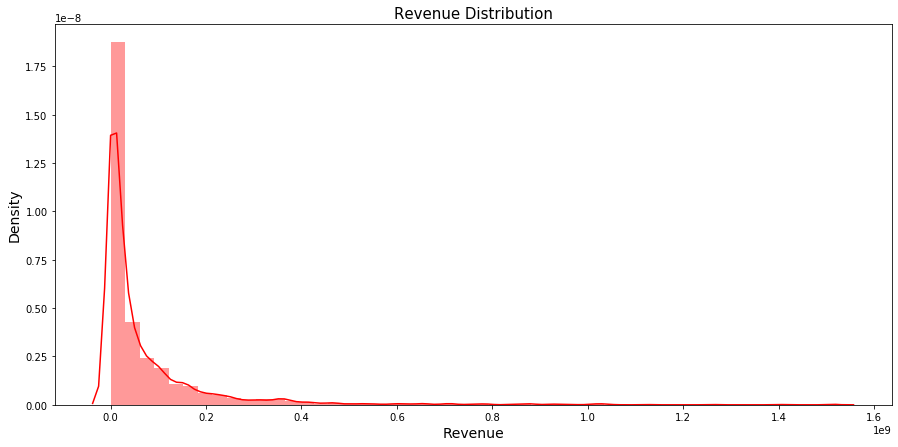

In [101]:
# Plot Revenue distribution
# Figure size 
plt.figure(figsize=(15,7)) 
# Plot
sns.distplot((train['revenue']), 
             # Color of graph
             color = "red", 
             # Showing Line 
             kde = True)
# X label
plt.xlabel("Revenue", size = 14)
# Y label
plt.ylabel("Density", size = 14)
# Title
plt.title("Revenue Distribution", size = 15);

Our insights were correct, the `revenue` distribution is highly right skewed. Ideally, we will want our target variable to be somewhat a normal distribution. Lets try to create that by taking the log of the `revenue` feature and show it's distribution. 

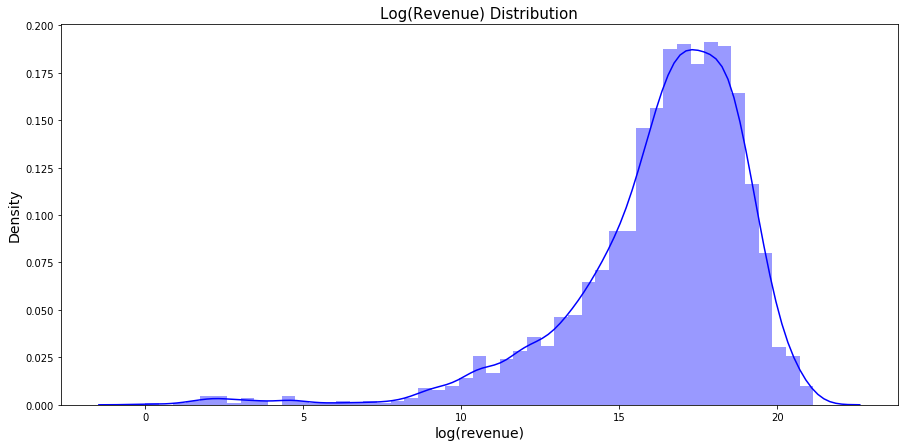

In [102]:
# Plot log Revenue distribution
# Figure size
plt.figure(figsize=(15,7))  
# Plot
sns.distplot(np.log(train['revenue']), 
             # Color of graph
             color = "blue", 
             # Showing line
             kde = True)
# X label
plt.xlabel("log(revenue)", size = 14)
# Y label
plt.ylabel("Density", size = 14)
# Title
plt.title("Log(Revenue) Distribution", size = 15);

This distribution looks more like a normal distribution now. Therefore, for our model it would be better if we use the log(revenue) because it would lessen the impact of outliers. Now lets reexamine the three original numerical features' distributions.

### Investigating Selected Univariate Distributions

[Back to Top](#Table-of-Contents:) 

We will investigate the distributions for the original numerical features: `budget`, `popularity`, and `runtime` because it its easier to see these distributions than our "created" numerical features. We will begin with the `budget` feature.

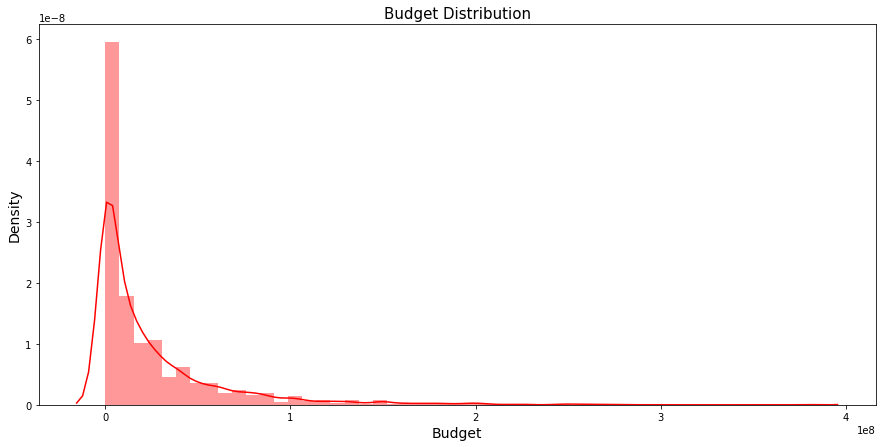

In [103]:
# Plot Budget distribution
# Figure size 
plt.figure(figsize=(15,7)) 
# Plot
sns.distplot((train['budget']), 
             # Color of graph
             color = "red",
             # Showing line
             kde = True)
# X label
plt.xlabel("Budget", size = 14)
# Y label
plt.ylabel("Density", size = 14)
# Title
plt.title("Budget Distribution", size = 15);

The `budget` feature has a highly right skewed distribution which means it has lots of outliers. We might want to take the log of this distribution as well. 

Next, lets check the `popularity` feature.

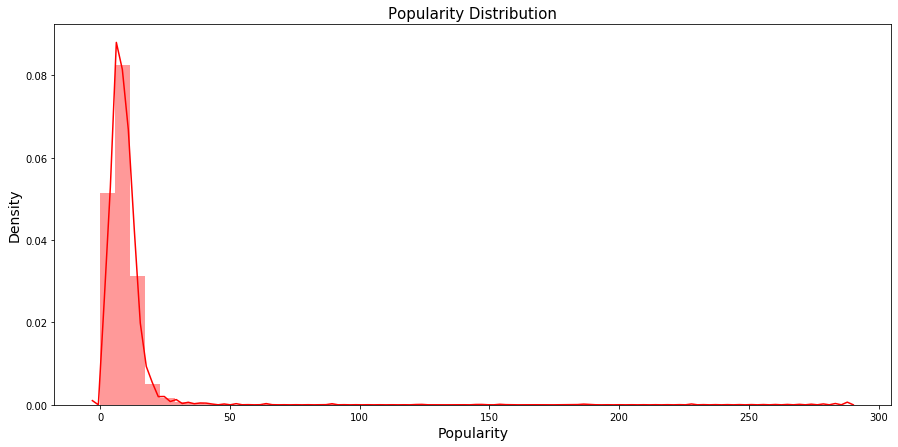

In [104]:
# Plot Popularity distribution
# Figure size
plt.figure(figsize=(15,7)) 
# Plot
sns.distplot((train['popularity']),
             # Color of graph
             color = "red", 
             # Showing line
             kde = True)
# X label
plt.xlabel("Popularity", size = 14)
# Y label
plt.ylabel("Density", size = 14)
# Title
plt.title("Popularity Distribution", size = 15);

The `popularity` feature also has a highly right skewed distribution which means it has lots of outliers. We might want to take the log of this distribution as well. 

Lastly, lets check the `runtime` feature.

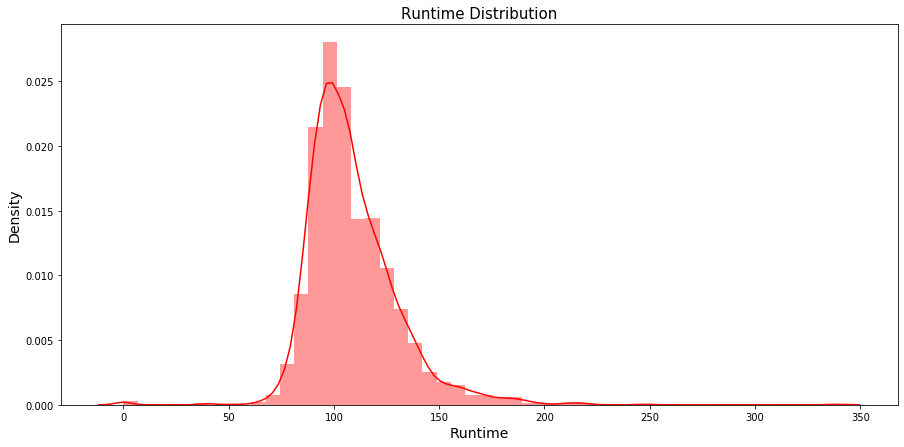

In [105]:
# Plot Runtime distribution
# Figure size 
plt.figure(figsize=(15,7)) 
# Plot
sns.distplot((train['runtime']), 
             # Color of graph
             color = "red", 
             # Showing line
             kde = True)
# X label 
plt.xlabel("Runtime", size = 14)
# Y label
plt.ylabel("Density", size = 14)
# Title
plt.title("Runtime Distribution", size = 15);

The `runtime` feature has a normal distribution which means it has little outliers and an ideal feature for our modeling.

Now that we explored these distributions, we can investigate the correlations between our original numerical features and some selected engineered features.

### Investigating Correlations

[Back to Top](#Table-of-Contents:)

Lets determine the relationships between our features and the target variable, and the way we can do that is exploring the corrleations. We will be using selected features because the binary features are not an ideal predictor to see visually. Thus, the features we will be exploring is the `budget`, `original_language`, `popularity`, `runtime`, `disney_production_company`, `twenty_century_fox_production_company`, `warner_bros_production_company`, `nbcuniversal_production_company`, `sony_pictures_production_company`, `paramount_pictures_production_company`, and `top_twenty_keywords` features with our target varible `revenue`. Lets create a subset dataset with these features called selected features. 

In [106]:
# Creating the subset dataset
selected_features = pd.DataFrame(data = [train['budget'], 
                                         train['original_language'],
                                         train['popularity'], 
                                         train['runtime'], 
                                         train['disney_production_company'],
                                         train['twenty_century_fox_production_company'],
                                         train['warner_bros_production_company'],
                                         train['nbcuniversal_production_company'],
                                         train['sony_pictures_production_company'],
                                         train['paramount_pictures_production_company'],
                                         train['top_twenty_keywords'], 
                                         train['revenue']]).T

First, we will focus on the overall correlations with this subset dataset to the target variable by using a heatmap. 

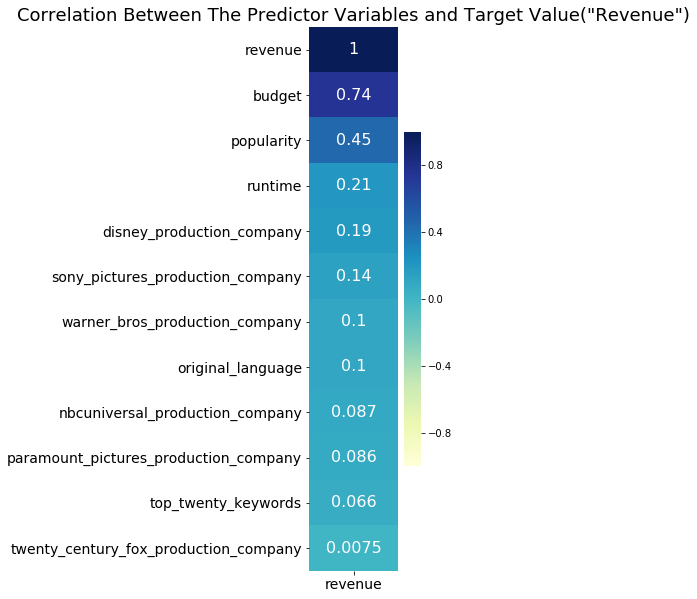

In [107]:
# Heatmap 
# Figure size
plt.figure(figsize=(2,10)) 
# Title
plt.title('Correlation Between The Predictor Variables and Target Value("Revenue")', fontsize = 18) 
# Plot
sns.heatmap(selected_features.corr()[['revenue']].sort_values('revenue', 
                                                              # With respect to revenue sort values of corr 
                                                     ascending = False), 
                                                             # Show all of the numeric columns in the graph
                                                     annot = True, 
                                                            # Color of graph
                                                     cmap = "YlGnBu", 
                                                            # Correlation min value
                                                     vmin = -1,
                                                            # Correlation max value 
                                                     vmax = 1, 
                                                            # Numbers on graph size
                                                     annot_kws = {'fontsize':16}) 
# Control the size of x axis label
plt.xticks(fontsize = 14) 
# Control the size of y axis label
plt.yticks(fontsize = 14); 

In the heat map, we noticed where the correlation is between the `revenue` and the individual features. We decided that the feature that correlates closer to 1 is the best feature in our model. This is the `budget` feature. This is reasonably because movies that spend great amount of money to advertise will gain attraction and in effect, individuals will spend money on the movie. The list that follows afterwards is `popularity`, `runtime`, `disney_production_company`, `sony_pictures_production_company`, `warner_bros_production_company`, `original_language`, `nbcuniversal_production_company`, `paramount_pictures_production_company`, `top_twenty_keywords` and `twenty_century_fox_production_company`. Something that was interesting to note was that the `original_language` feature has little correlation with `revenue`. As a result, movies in original langauges does not matter anymore because movies now provide subtitles or other languages spoken over the original.  

Now, we can individually explore these selected features correlations with the target variable. We will begin with the `budget` feature.

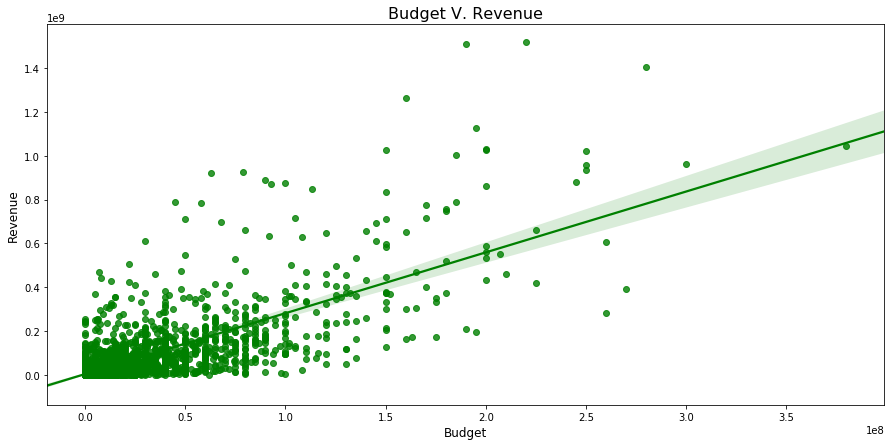

In [108]:
# Budget v. Revenue
# Figure size
plt.figure(figsize=(15,7))
# Plot
sns.regplot(train['budget'], 
            train['revenue'],
            # Color of graph
            color = 'green') 
# Title
plt.title('Budget V. Revenue', fontsize = 16) 
# X label
plt.xlabel('Budget', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12);

We observe that there is a high concentration with low budget flims in the training dataset. Also, there is a weak positive correlation between the `budget` feature and `revenue` because of its outliers.

Next, lets check the `popularity` feature.

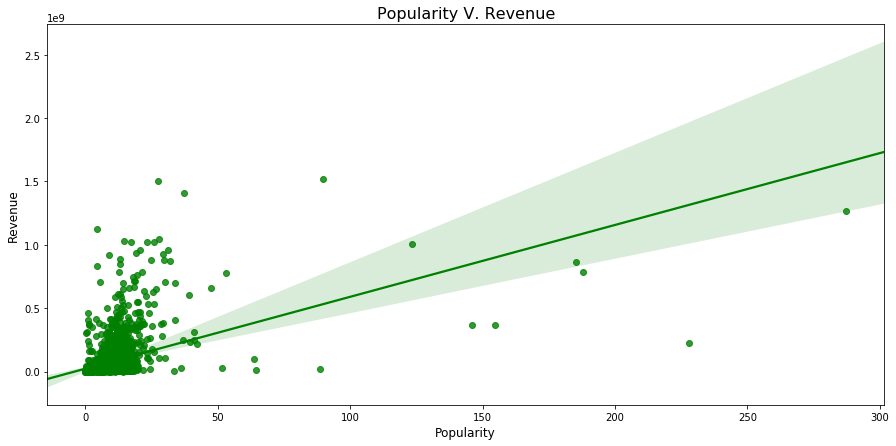

In [109]:
# Popularity v. Revenue
# Figure size
plt.figure(figsize=(15,7))
# Plot
sns.regplot(train['popularity'], 
            train['revenue'],
            # Color of graph
            color = 'g') 
# Title
plt.title('Popularity V. Revenue', fontsize = 16) 
# X label
plt.xlabel('Popularity', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12);

We observe that there is a high concentration with low popularity flims in the training dataset. Also, there is a weak positive correlation between the `popularity` feature and `revenue` because of its outliers.

Next, lets check the `runtime` feature.

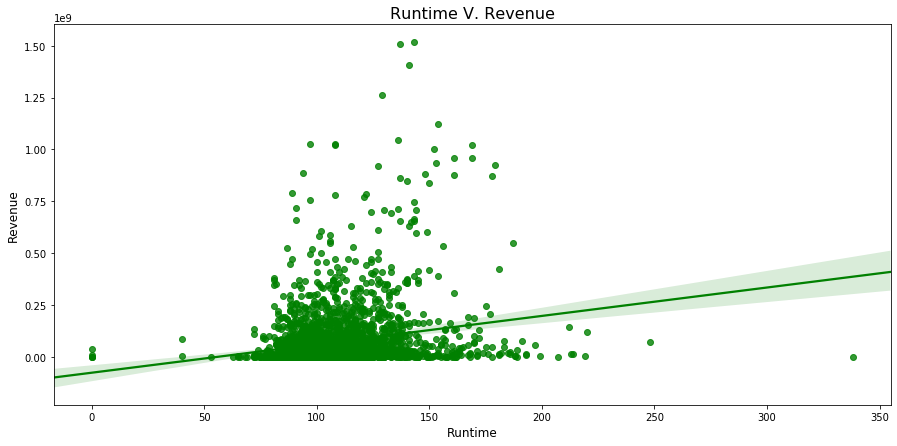

In [110]:
# Runtime v. Revenue
# Figure size 
plt.figure(figsize=(15,7))
# Plot
sns.regplot(train['runtime'], 
            train['revenue'],
            # Color of graph
            color = 'g') 
# Title
plt.title('Runtime V. Revenue', fontsize = 16) 
# X label
plt.xlabel('Runtime', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12);

We observe that there is a high concentration with average runtime flims in the training dataset. Also, there is a strong positive correlation between the `runtime` feature and `revenue`. Yet, there are still outliers.

Next, lets check the `original_language` feature.

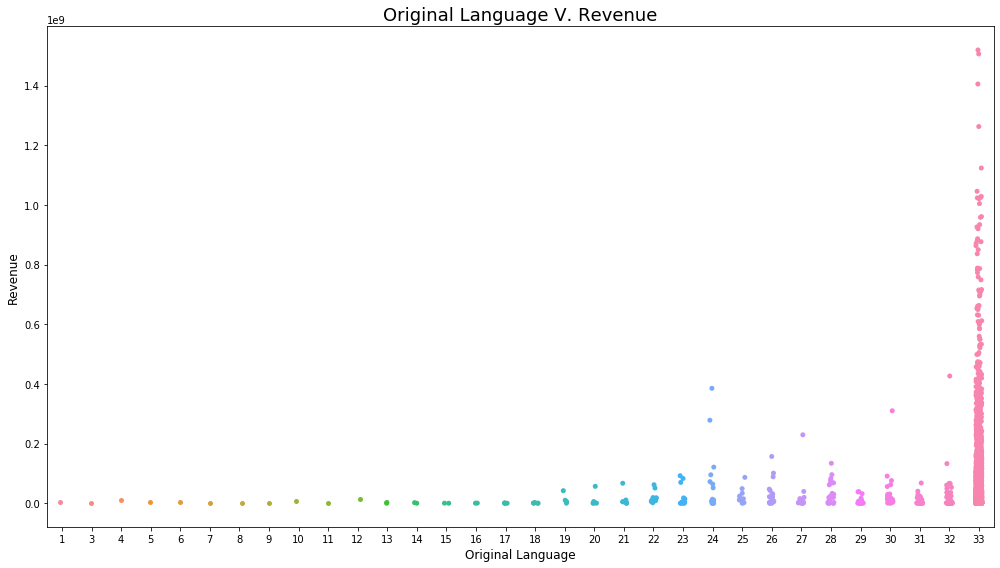

In [111]:
# Original language v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Original Language V. Revenue", fontsize = 18)
# Plot
sns.stripplot(train['original_language'], 
              train['revenue'])
# X label
plt.xlabel('Original Language', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Tight layout
plt.tight_layout();

We observe that in the `original_language` feature, the value that has the most amount is 33 which if we go back to our lengend in [Mapped `original_language` Feature](#Mapped-original_language-Feature), we see that it is the English language. As a result, we can assume that majority of flims in our training dataset is in English. Also, there are a lot of outliers at this particular value. In sum, we can determine that this feature is left skewed. So this feature is a negatively-skewed distribution.

Next, lets check the `top_twenty_keywords` feature.

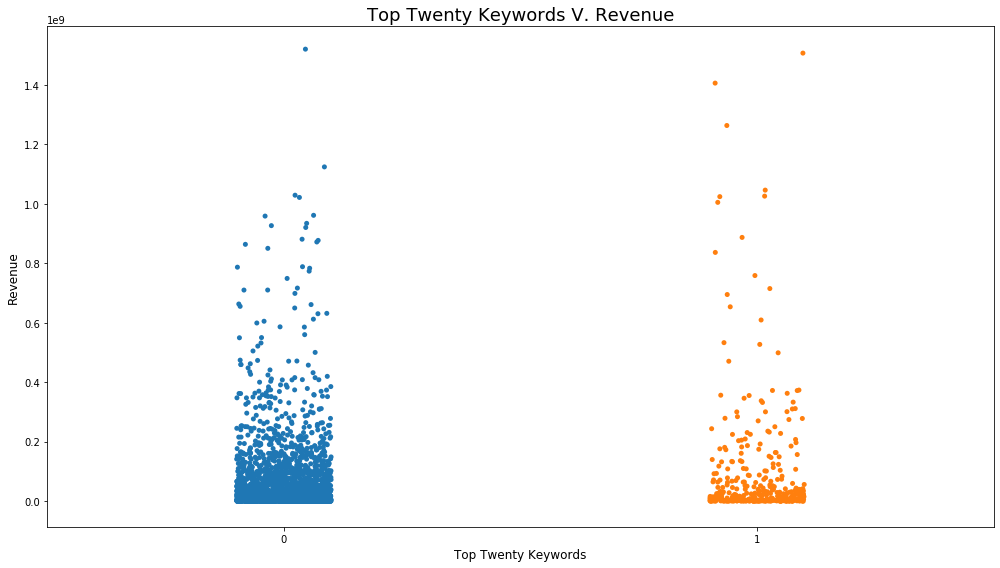

In [112]:
# top_twenty_keywords v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Top Twenty Keywords V. Revenue", fontsize = 18)
# Plot
sns.stripplot(train['top_twenty_keywords'], 
              train['revenue'])
# X label
plt.xlabel('Top Twenty Keywords', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Tight layout
plt.tight_layout();

We observe that there are less values that are the top twenty keywords in the training dataset. Also, there is a high concentration with low revenue with the `top_twenty_keywords` feature. Also, there are outliers. 

Next, lets check the `disney_production_company` feature.

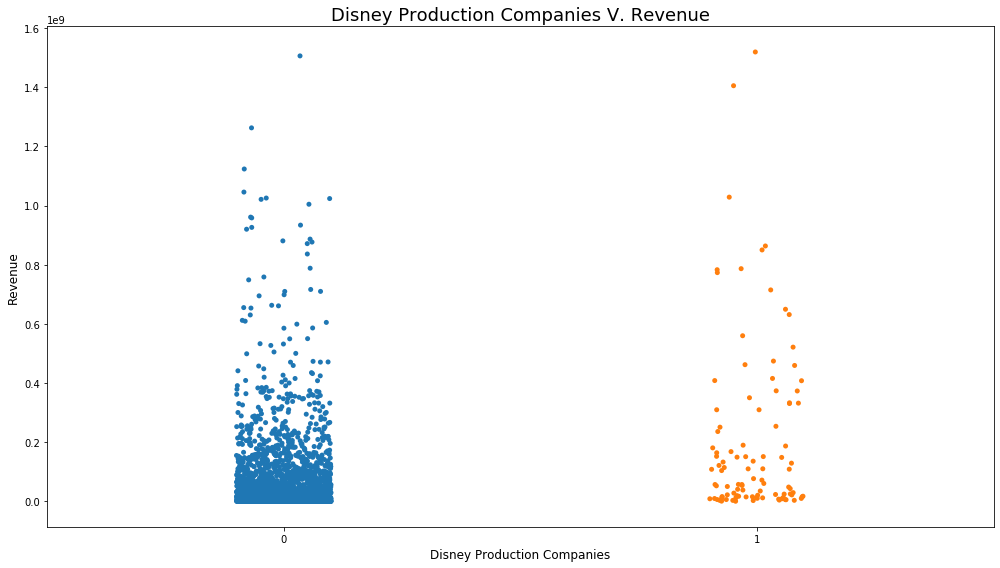

In [113]:
# disney_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Disney Production Companies V. Revenue", fontsize = 18)
# Plot
sns.stripplot(train['disney_production_company'], 
              train['revenue'])
# X label
plt.xlabel('Disney Production Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Tight layout
plt.tight_layout();

We observe again, there are less values that are the feature in the training dataset. Also, there is a wide spread of the `disney_production_compaines` feature. Also, there are outliers.

Next, lets check the `sony_pictures_production_company` feature.

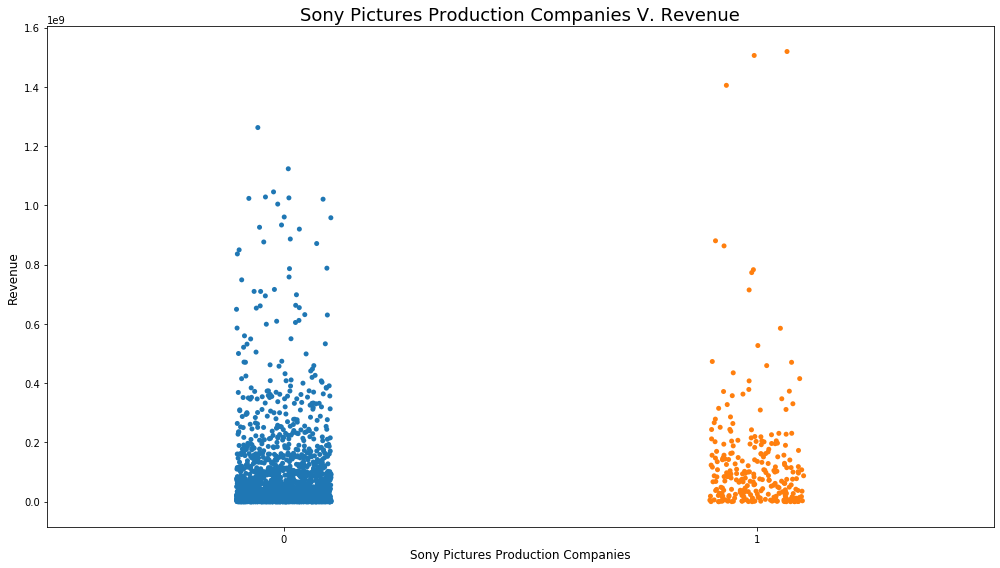

In [114]:
# sony_pictures_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Sony Pictures Production Companies V. Revenue", fontsize = 18)
# Plot
sns.stripplot(train['sony_pictures_production_company'], 
              train['revenue'])
# X label
plt.xlabel('Sony Pictures Production Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Tight layout
plt.tight_layout();

We observe again, there are less values that are the feature in the training dataset. Also, there is a high concentration with low revenue with the `sony_pictures_production_companies` feature. Also, there are outliers.

Next, lets check the `warner_bros_production_company` feature.

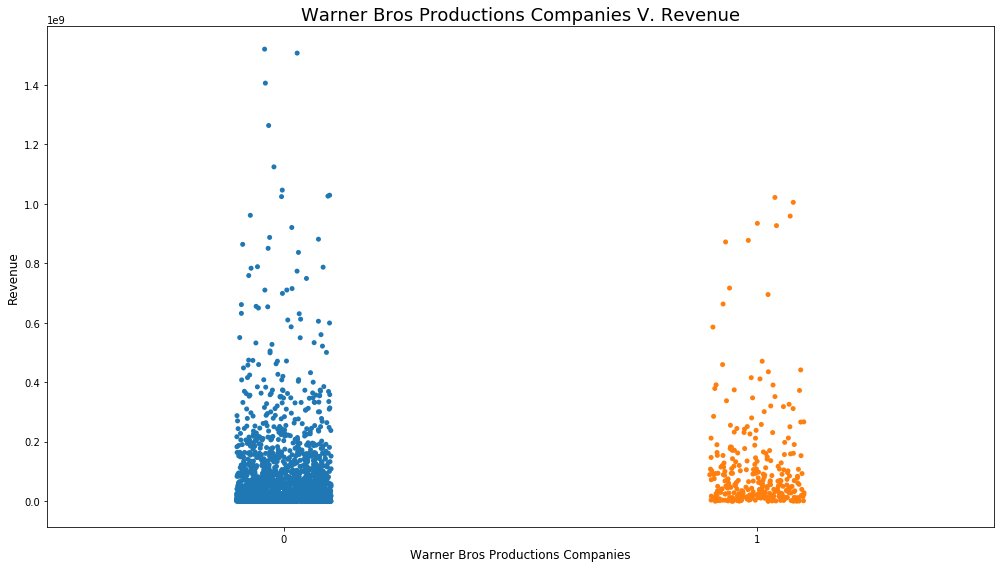

In [115]:
# warner_bros_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Warner Bros Productions Companies V. Revenue", fontsize = 18)
# Plot
sns.stripplot(train['warner_bros_production_company'], 
              train['revenue'])
# X label
plt.xlabel('Warner Bros Productions Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Tight layout
plt.tight_layout();

We observe again, there are less values that are the feature in the training dataset. Also, there is a high concentration with low revenue with the` warner_bros_production_companies` feature. 

Next, lets check the `nbcuniversal_production_company` feature.

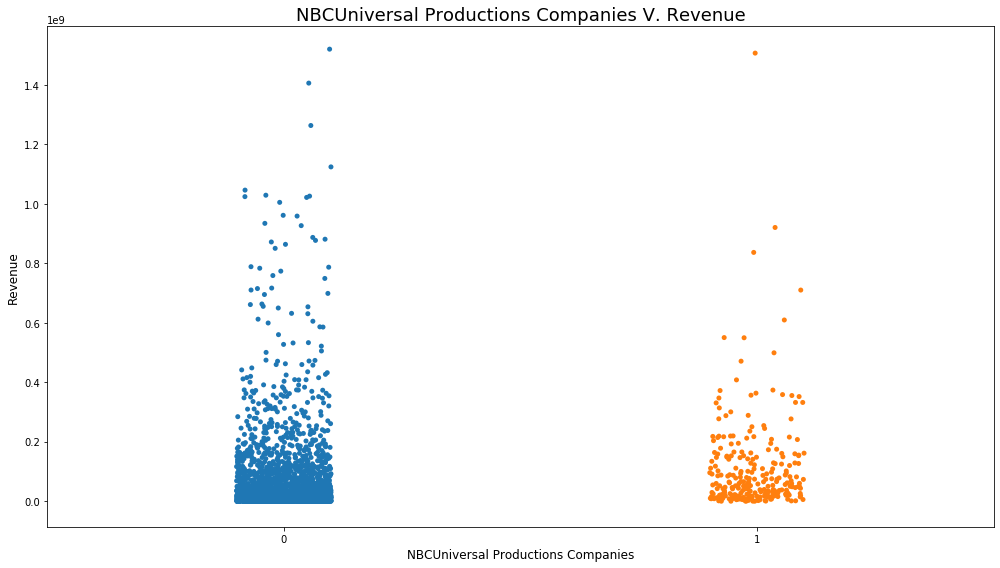

In [116]:
# nbcuniversal_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("NBCUniversal Productions Companies V. Revenue", fontsize = 18)
# Plot
sns.stripplot(train['nbcuniversal_production_company'], 
              train['revenue'])
# X label
plt.xlabel('NBCUniversal Productions Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Tight layout
plt.tight_layout();

We observe again, there are less values that are the feature in the training dataset. Also, there is a high concentration with low revenue with the `nbcuniversal_production_companies` feature. Also, there are a couple of outliers. 

Next, lets check the `paramount_pictures_production_company` feature.

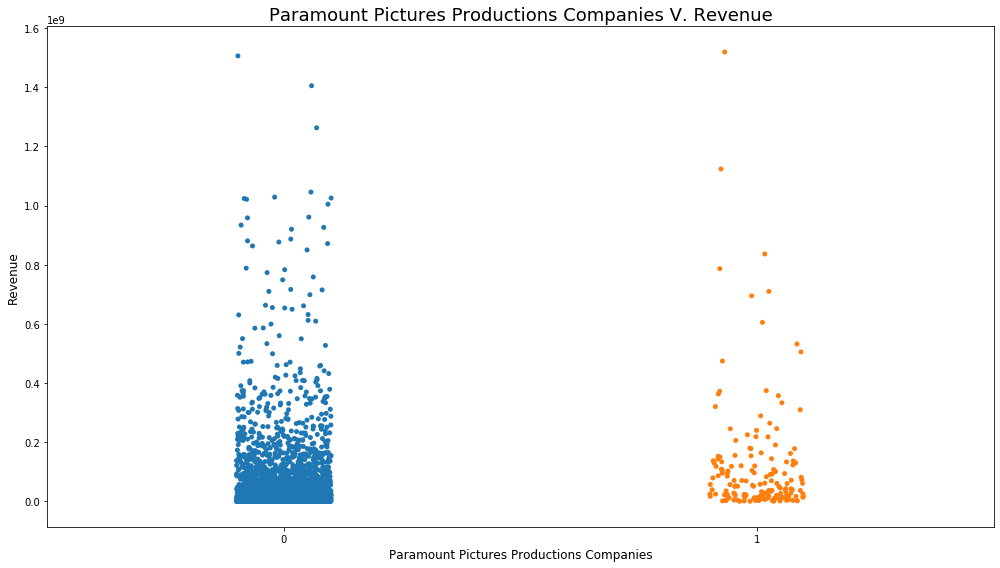

In [117]:
# paramount_pictures_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Paramount Pictures Productions Companies V. Revenue", fontsize = 18)
# Plot
sns.stripplot(train['paramount_pictures_production_company'], 
              train['revenue'])
# X label
plt.xlabel('Paramount Pictures Productions Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Tight layout
plt.tight_layout();

We observe again, there are less values that are the feature in the training dataset. Also, there is a high concentration with low revenue with the `paramount_picture_production_companies` feature. Also, there are a couple of outliers.

Lastly, lets check the `twenty_century_fox_production_company` feature.

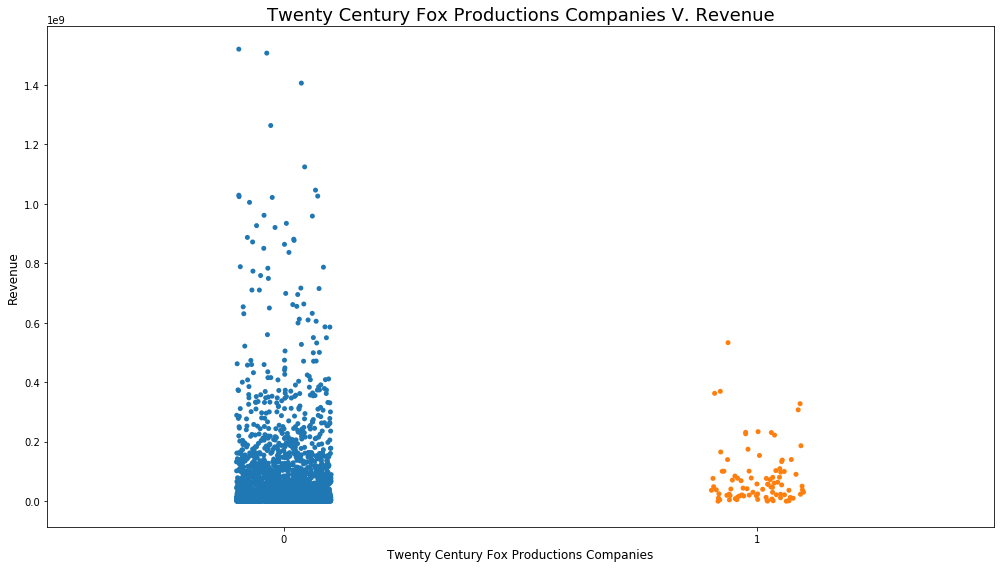

In [118]:
# twenty_century_fox_production_company v. Revenue
# Figure size 
plt.figure(figsize=(14,8)) 
# Title
plt.title("Twenty Century Fox Productions Companies V. Revenue", fontsize = 18)
# Plot
sns.stripplot(train['twenty_century_fox_production_company'], 
              train['revenue'])
# X label
plt.xlabel('Twenty Century Fox Productions Companies', fontsize = 12)
# Y label
plt.ylabel('Revenue', fontsize = 12)
# Tight layout
plt.tight_layout();

We observe again, there are less values that are the feature in the training dataset. Also, there is a high concentration with low revenue with the `twenty_century_fox_production_companies` feature. 

In sum, we were able to deep dive into the correlations between the selected subset of features and the target varibable. We found some interesting trends. There are a lot of movies that have low revenue and there are a lot of outliers with extremely high revenue. It seems the `disney_production_company`, `sony_pictures_production_companies`, `nbcuniversal_production_companies`, and `paramount_picture_production_companies` features have movies that created great amounts of revenue. This is reasonable because in the past couple of years, movies have been getting a lot of traction with sci fi franchise movies and these are the compaines who make them. Lastly, some of the values in the `top_twenty_keywords` features have high revenue. If we can identify the keyword from a particular movie, we can determine if it had high or low revenue.

We are going to change gears and reexamine the binary features. We will do this by using the dataframes we created in the [binary feature selection](#Creating-Binary-Features) to explore its frequency count.

### Investigating Binary Features Frequencies

[Back to Top](#Table-of-Contents:)

The only way to visually focus on the binary features is to look at it's frequencies in the training dataset. We will begin in the order that we original created such features. We start with `genres` feature.  

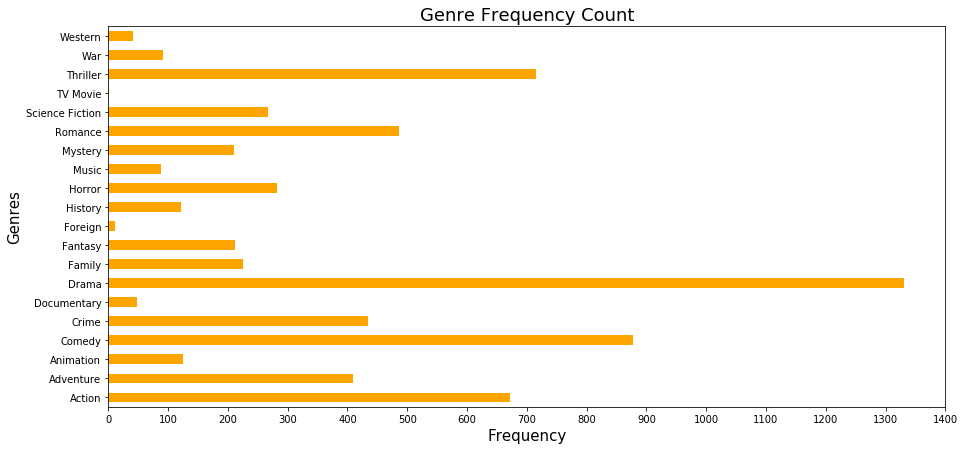

In [119]:
# Evaluating genres frequencies
# Plot
train_genres_dummies.sum().plot(kind = 'barh',
                                # Color of graph
                    color = 'orange', 
                                # Figure size
                    figsize = (15,7))
# Title
plt.title('Genre Frequency Count', fontsize = 18)
# X label
plt.xlabel('Frequency', fontsize = 15)
# Y label
plt.ylabel('Genres', fontsize = 15)
# X tick size
plt.xticks(np.arange(0, 1500, step = 100));

We observe that the highest value for the `genres` feature is Drama in the training dataset. The lowest generes are TV Movie and Foreign. This is reasonable because now and days, individuals are either streaming movies or they go out of their homes to view movies. Also, movies aren't really consider Foreign anymore because a movie can be watched with subtitles or change the language to meet the individuals needs. 

Next, lets check the `production_countries` feature.

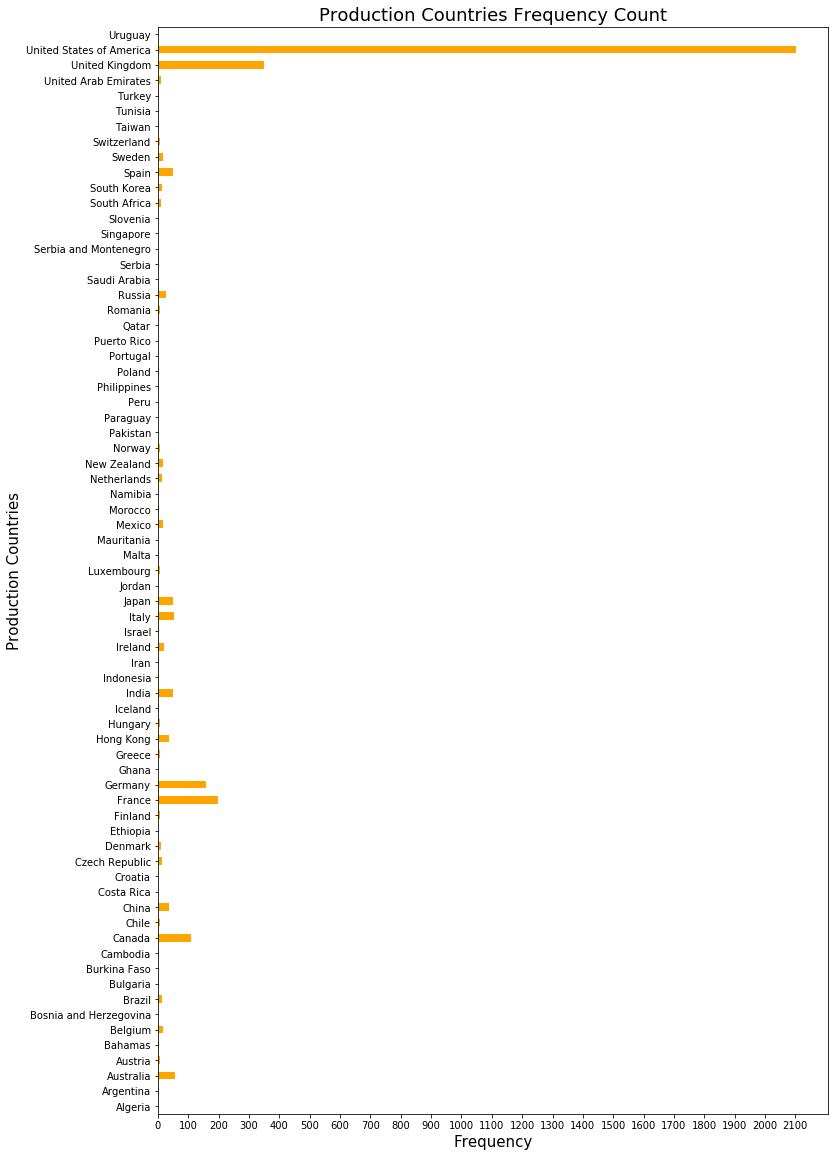

In [120]:
# Evaluating production countries frequencies
# Plot
train_production_countries_dummies.sum().plot(kind = 'barh', 
                                              # Color of graph
                                   color = 'orange', 
                                              # Figure size         
                                   figsize = (12,20))
# Title
plt.title('Production Countries Frequency Count', fontsize = 18)
# X label
plt.xlabel('Frequency', fontsize = 15)
# Y label
plt.ylabel('Production Countries', fontsize = 15)
# X tick size
plt.xticks(np.arange(0, 2200, step = 100));

We observe that the highest value for the `production_countries` feature is the United States of America in the training dataset. This is reasonable because the United States of America has a lot of resources for movies. Also, we should point out that China and India do not make a lot of movies. One can hypothesize that countires that have high populations will come up with lots of movies. Yet, this shows the opposite of this hypothesis. 


We decided to skip the `spoken_lanaguges` feature because the length of the graph is too cumbersome. Next, we will check the `status` feature.

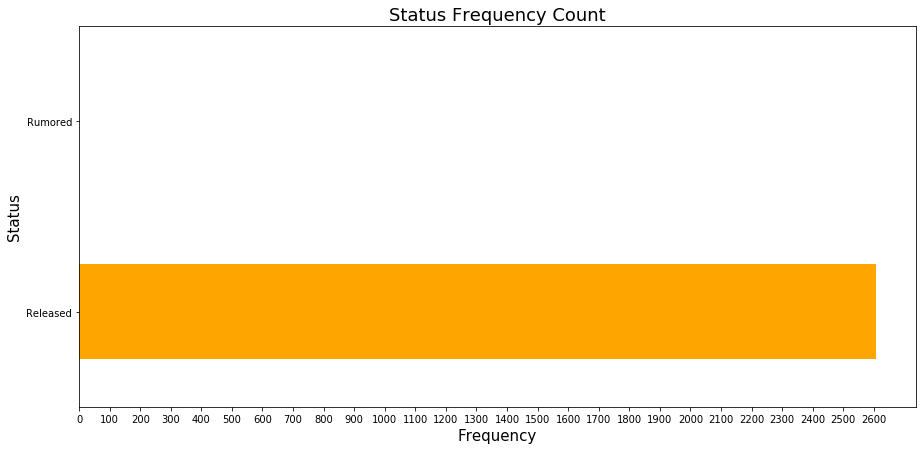

In [121]:
# Evaluating crew departments frequencies
# Plot
train_status_dummies.sum().plot(kind = 'barh',
                                          # Color of graph
                                color = 'orange', 
                                          # Figure size  
                                figsize = (15,7))
# Title
plt.title('Status Frequency Count', fontsize = 18)
# X label
plt.xlabel('Frequency', fontsize = 15)
# Y label
plt.ylabel('Status', fontsize = 15)
# X tick size
plt.xticks(np.arange(0, 2700, step = 100));

We observe that the highest value for the `status` feature are movies that were released already. This is reasonable because these movies will be viewed by the public, and the public generates the revenue. Also, we should point out that this training dataset, it wanted to put in rumored movies as well which is pretty intersting because movies that are not in the public should not be consider as a feature to obtain revenue. Maybe that is an outlier.

As our finally graph in this section, we will check the `crew_departments` feature. 

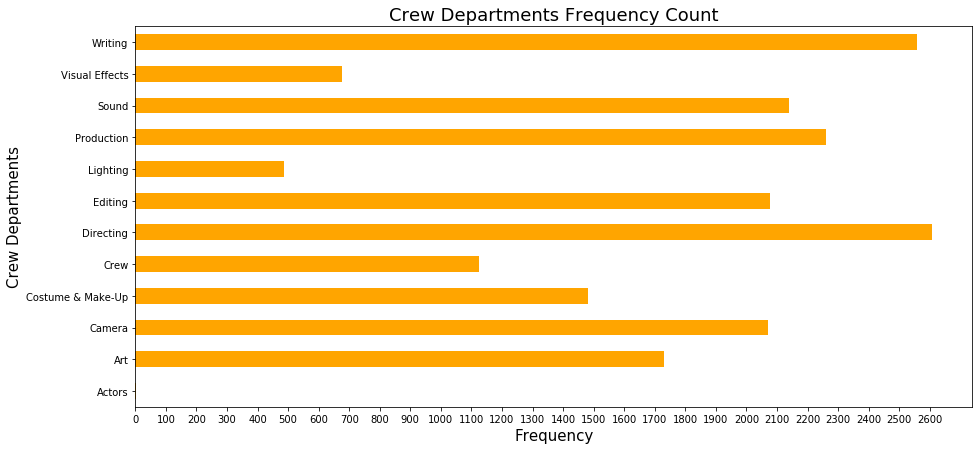

In [122]:
# Evaluating crew departments frequencies
# Plot
train_crew_departments_dummies.sum().plot(kind = 'barh',
                                          # Color of graph
                                color = 'orange', 
                                          # Figure size  
                                figsize = (15,7))
# Title
plt.title('Crew Departments Frequency Count', fontsize = 18)
# X label
plt.xlabel('Frequency', fontsize = 15)
# Y label
plt.ylabel('Crew Departments', fontsize = 15)
# X tick size
plt.xticks(np.arange(0, 2700, step = 100));

We observe that the highest value for the `crew_departments` feature is directing. This is resonable because movies cannot be made without directors. Also, we should point out that Actors are very insignificant to the movie process. Thus, Actors can be replaced at any given notice while in other departments its harder to replace individuals.

In sum, we were able to deep drive into the binary features and determine which item had the highest value in each binary feature. We found some interesting trends. We noticed that Drama movies are viewed by a lot of individuals, the USA produces the most movies, and directing is the highest crew department.  
For the last part of our visualizations, we will investigate the datetime features.

### Investigating Datetime Features

[Back to Top](#Table-of-Contents:)

We have three datetime features: `release_date`, `month_release_date`, and `year_release_date`. In other words, we can detect trends and seasonality with these features. Lets begin by plotting the `release_date` feature.

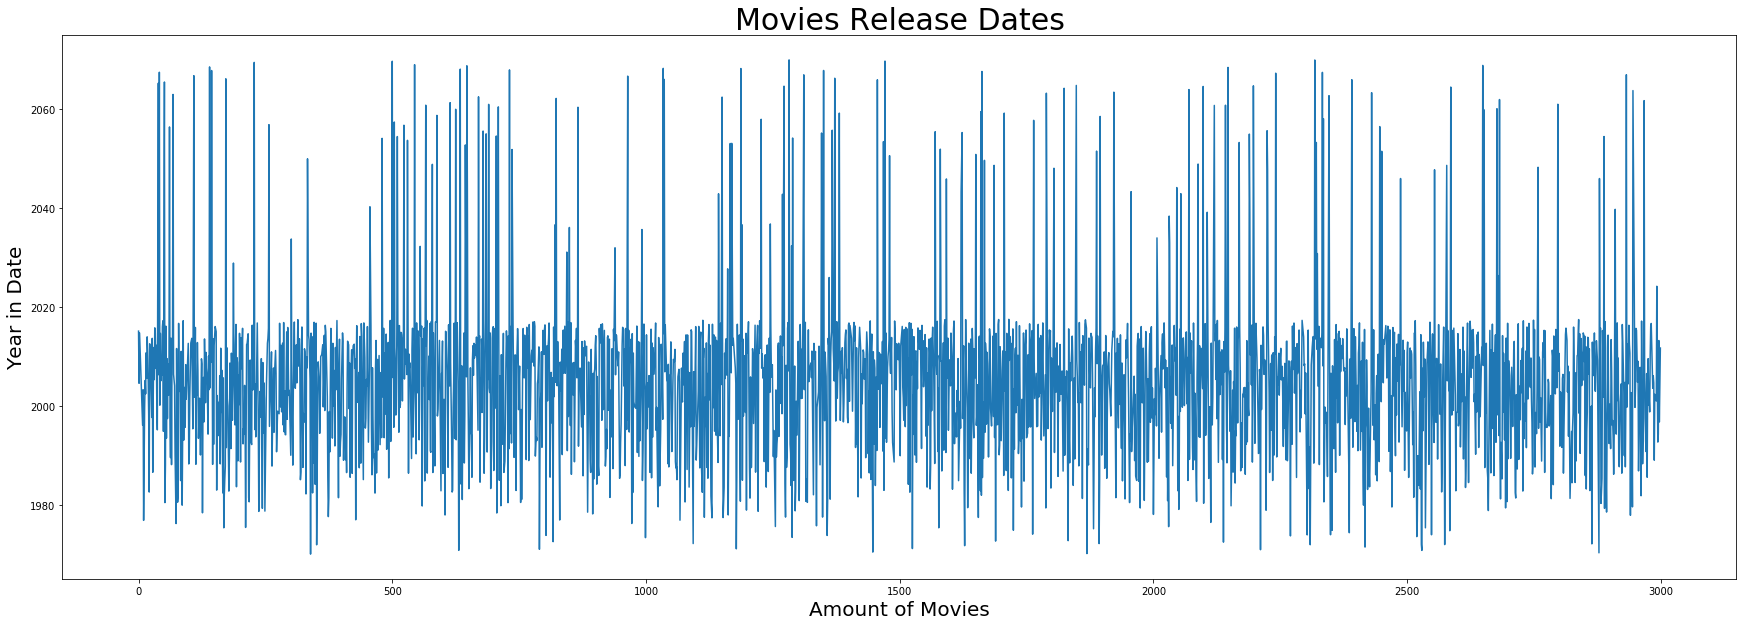

In [123]:
# Plotting the release_date
# Figure size 
plt.figure(figsize = (30, 10))
# Plot
plt.plot(train.release_date.index, 
         train['release_date'])
# Title
plt.title("Movies Release Dates", fontsize = 30)
# X label
plt.xlabel('Amount of Movies', fontsize = 20)
# Y label
plt.ylabel('Year in Date', fontsize = 20);

The `release_date` feature is steady over time and they are fluctuations, but it's tough to see if there are fluctuations on a fixed and known frequency. Also, there are outliers. Lets now plot the `month_release_date` to get a better understanding of the trends.

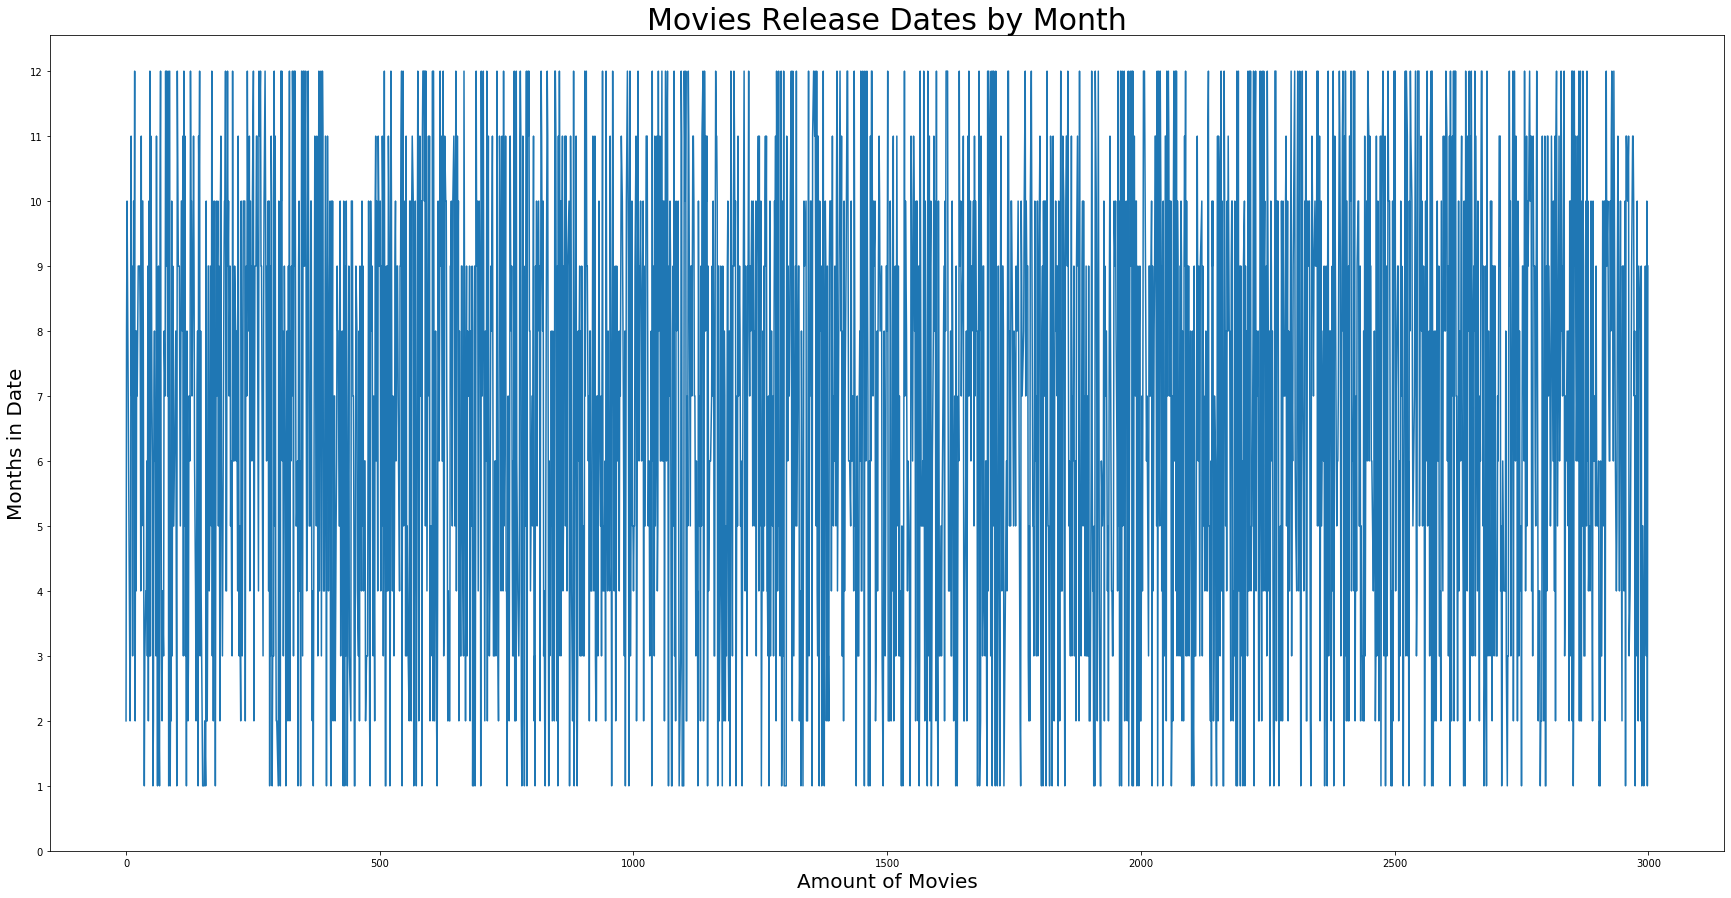

In [124]:
# Plotting the month_release_date
# Figure size 
plt.figure(figsize = (30, 15))
# Plot
plt.plot(train.month_release_date.index, 
         train['month_release_date'])
# Title
plt.title("Movies Release Dates by Month", fontsize = 30)
# X label
plt.xlabel('Amount of Movies', fontsize = 20)
# Y label
plt.ylabel('Months in Date', fontsize = 20)
# Y tick size
plt.yticks(np.arange(0, 13, step = 1));

The `month_release_date` feature is steady over time and they are fluctuations all well. We observe that a lot of movies are released during the summer season because of the high concentration in this region. This is reasonable because individuals are more likely to go outdoors durning this season. Lastly, lets plot the `year_release_date` feature. 

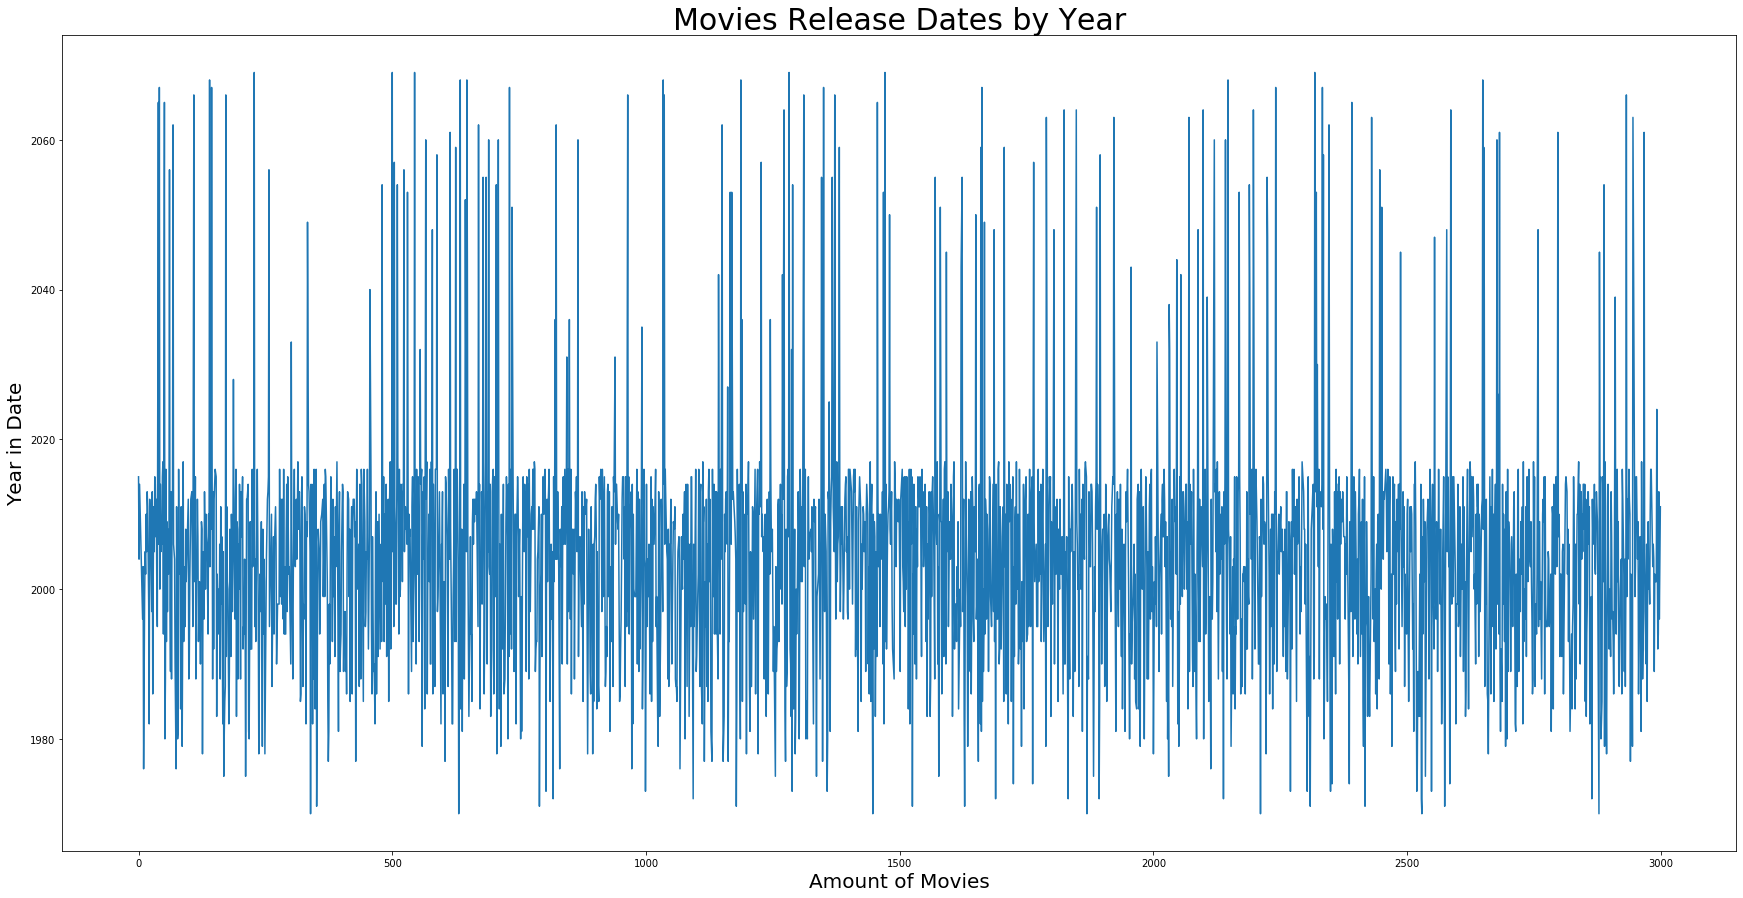

In [125]:
# Plotting the year_release_date
# Figure size 
plt.figure(figsize = (30, 15))
# Plot
plt.plot(train.year_release_date.index, 
         train['year_release_date'])
# Title
plt.title("Movies Release Dates by Year", fontsize = 30)
# X label
plt.xlabel('Amount of Movies', fontsize = 20)
# Y label
plt.ylabel('Year in Date', fontsize = 20);

The `year_release_date` feature is steady over time and they are fluctuations as well. We observe that a lot of movies were released during 2000-2020 because of the high concentration in this region. This is reasonable because technology has grown in these years which in effect, made movies more enjoyable to watch. Also, there are outliers.

In sum, we were able to deep drive into the datetime features and determine the trends. We noticed that the summer season and dates between 2000-2020 have been the most active for movie releases. In our final section in EDA, we will determine our outliers. 

### Outliers

[Back to Top](#Table-of-Contents:)

An outlier is a data value that is lower or higher than the rest of the data values in that particular dataset. For our training dataset we will take away the outliers that are nonsensical/irregular to the features. We were able to observe which features that have outliers from their visualizations. These features were the `popularity`, `runtime`, and `release_date` features. We will be begin with exploring the `popularity` feature for outliers.

In [126]:
# Popularity Feature
train['popularity'].sort_values(ascending = True)

741       0.000578
862       0.007294
2426      0.021580
2920      0.042036
1053      0.044048
           ...    
1309    154.801009
2126    185.330992
2326    187.860492
1695    228.032744
684     287.253654
Name: popularity, Length: 2609, dtype: float64

The `popularity` feature determines how popular a movie is to the public. It is rated out of 100, thus movies that are rated higher is an outlier. Lets drop them now.

In [127]:
# Dropping the outliers
train = train[train['popularity'] < 100]

# Lets check to see if it worked 
train['popularity'].max()

89.887648

We successfully dropped the outliers from the `popularity` feature. Next, lets explore the `runtime` feature for outliers.

In [128]:
# Runtime Feature
train['runtime'].sort_values(ascending = True)

1255      0.0
2865      0.0
1541      0.0
924       0.0
591       0.0
        ...  
1914    214.0
1302    219.0
523     220.0
1922    248.0
1211    338.0
Name: runtime, Length: 2602, dtype: float64

The `runtime` feature determines how long the movie is in minutes. The [average movie length](https://www.google.com/search?q=the+average+movie+length&rlz=1C5CHFA_enUS877US877&oq=the+average+movie&aqs=chrome.1.69i57j0l7.7070j0j7&sourceid=chrome&ie=UTF-8) is about 96.5 minutes. Thus, any movie thats is drastically higher will be dropped. We will determine that any movie higher than 200 minutes will be dropped.

In [129]:
# Dropping the outliers
train = train[train['runtime'] < 200]

# Lets check to see if it worked 
train['runtime'].max()

199.0

We successfully dropped the outliers from the `runtime` feature. Lastly, lets explore the `release_date` feature for outliers.

In [130]:
# Release_date Feature
train['release_date'].sort_values(ascending = True)

339    1970-01-27
1869   1970-03-05
2878   1970-05-01
1447   1970-06-24
2529   1970-10-26
          ...    
228    2069-06-17
500    2069-09-10
1471   2069-09-23
2318   2069-12-12
1282   2069-12-18
Name: release_date, Length: 2594, dtype: datetime64[ns]

The `release_date` feature tells us when the movie was released. However, we are not able to determine movies from 2020 and onwards because this dataset was created in 2019. Therefore, we will drop these dates from our dataset.

In [131]:
# Dropping the outliers
train = train[train['release_date'] < '2020-01-01']

# Lets check to see if it worked 
train['release_date'].max()

Timestamp('2017-06-23 00:00:00')

We successfully dropped the outliers from the `released_date` feature. In sum, we dropped all of the outliers we thought were nonsensical/irregular to our features. 

We will now have to transition into our next section: preprocessing.

## Preprocessing

[Back to Top](#Table-of-Contents:) 

Before we start modeling, we will need to do some preparation. We will begin by creating new features based off of our exploratory analysis. Then, we will set the columns in each data set equal to one another to be able to model.  Next, we will create our X features and y. We will train-test split. Then, we will scale our data. Lastly, determine the baseline score.

### Feature Engineering

[Back to Top](#Table-of-Contents:) 

Based on our exploratory data analysis on our target varaible and univariate distributions, we realize that we need to apply log transformations to the target variable `revenue` and the `budget` feature because both exhibit skewed distributions and we will want to cushion the impact of any inherent outliers. However, after runing some models with our feature engineering features, our models actually did worst. So we will be keeping our same values for the `revenue` and `budget` features.

Next, lets make the same amount of features in both datasets.

### Setting The Features Equal 

[Back to Top](#Table-of-Contents:) 

Again, some features in our training dataset is not in our testing and vice visa. We need to have all features in both datasets to model. Lets do that now.

In [132]:
# Getting the training dataset features that are not in the testing
# Using the set method
missing_columns_in_train = list(set(test.columns) - set(train.columns))

In [133]:
# Getting the testing dataset features that are not in the training
# Using the set method
missing_columns_in_test = list(set(train.columns) - set(test.columns))

Next, we have to create the missing features in both datasets.

In [134]:
# Using a loop to put in the features that are missing in the training dataset
for column in missing_columns_in_train: 
    train[column] = 0

In [135]:
# Using a loop to put in the features that are missing in the testing dataset
for column in missing_columns_in_test: 
    test[column] = 0

In [136]:
# Check to see if it worked
print(f'This is the training dataset shape: {train.shape}')
print(f'This is the testing dataset shape: {test.shape}')

This is the training dataset shape: (2453, 211)
This is the testing dataset shape: (4398, 211)


We successfully were able to correctly set the features in both datasets equally. Next, let create our X feature and y. 

### Creating X features and y

[Back to Top](#Table-of-Contents:) 

We need to create our features matrix (X) and target vector (y). For our X features, we will use most of all the features in our training dataset. We will not use the `original_title` and `title` features because they cannot be transformed into a numerical format and we will not use the `release_date`, `month_release_date`, and `year_release_date` because we will not be able to scale these features for the future. Lets implement this now. For our y, we will use our target variable `revenue`.   

In [137]:
# X features
X = train.drop(columns = ['revenue', 
                          'original_title', 
                          'title', 
                          'release_date', 
                          'month_release_date', 
                          'year_release_date'], 
                          axis = 1) 
# y vector
y = train['revenue'] 

In [138]:
# Check to see if it worked
X.head()

,budget,original_language,popularity,runtime,disney_production_company,twenty_century_fox_production_company,warner_bros_production_company,nbcuniversal_production_company,sony_pictures_production_company,paramount_pictures_production_company,...,thailand,bolivia,cymraeg,bamanankan,қазақ,kazakhstan,angola,colombia,ecuador,cameroon
0,14000000,33,6.575393,93.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,40000000,33,8.248895,113.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3300000,33,64.299990,105.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,33,6.902423,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6000000,33,4.672036,91.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, lets use train-test split on our X and y.

### Train-test Split

[Back to Top](#Table-of-Contents:) 

In [139]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Next, lets scale our data.

### Scaling The Data

[Back to Top](#Table-of-Contents:) 

We need to scale our data because it helps to normalise the data. 

In [140]:
# Using the Standard Scaler to scale our features
sc = StandardScaler()
sc.fit(X_train);

Finally, lets determine the baseline score.

### Determing the Baseline Score

[Back to Top](#Table-of-Contents:) 

The baseline score is actually an accuracy score. It is the percentage of the majority class, regardless of whether our y is 100 percent. It will serve as the benchmark for our regression models to beat.

In [141]:
# Checking the baseline score
y_test.value_counts(normalize = True)

11000000    0.004886
25000000    0.003257
2500000     0.003257
7500000     0.003257
20000000    0.003257
              ...   
77477008    0.001629
33463969    0.001629
6500000     0.001629
6149791     0.001629
3200000     0.001629
Name: revenue, Length: 608, dtype: float64

The majority class end up being about 11,000,000 dollars in revenue. In other words, a typical movie should make about 1.1 million dollars in revenue.

Hence, we finished our preprocessing. We will now have to transition into our next section: modeling.

## Modeling

[Back to Top](#Table-of-Contents:) 

We are going to be modeling different regression models to determine how accurate it is towards our problem statement with it's accuracy score. We will model: Linear Regression with default hyperparameters, GridSearch on Lasso Regression, GridSearch on Ridge Regression, GridSearch on DecisionTreeRegressor, GridSearch on BaggedRegressor, GridSearch on RandomForestRegressor, GridSearch on AdaBoostRegressor, GridSearch on GradientBoostingRegressor, GridSearch on SVR, and GridSearch on VotingRegressor. 


Also, we will use root mean square error as another metric to determine our insights on each model. Then, we will supplement each model with it's repected visualization. We graph the predictive values with respect to the actual values for each model. Finally, we will visually explore the coefficients for each model.

Lets create a helper function for our plotting predicitive values v. actual values. 

In [142]:
# Visualizing predicitive values v. actual values
def plot_pred_values_vs_actual_values(model_name, preds_train):
    # Figure size
    plt.figure(figsize=(12,9))

    # Generate a scatterplot of predicted values versus actual values.
    plt.scatter(preds_train, 
                y_train, 
                s = 5, 
                color = 'blue') 

    # Plot a best fit line.
    plt.plot([0, np.max(y_train)],
             [0, np.max(y_train)], 
             color = 'black') 
    # Title
    plt.title(model_name + ': Predicted Values v. Actual Values', fontsize = 20)
    # X label
    plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 18) 
    # Y label
    plt.ylabel("Actual Values: $y$", fontsize = 18);

Lets begin with our basic linear regression model.

### Linear Regression

[Back to Top](#Table-of-Contents:) 

Linear regression uses multiple predictor variables to estimate a continuous target.

In [143]:
# Modeling Linear
# Instantiate model
lr = LinearRegression()
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(lr, X_train , y_train, cv = 5).mean()}")
print('---------------')

# Fit model
lr.fit(X_train, y_train)

# Get r2 scores
train_score = lr.score(X_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = lr.score(X_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
lr_preds_train = lr.predict(X_train)
lr_preds_test = lr.predict(X_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, lr_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, lr_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')

The model's cross vaildation score: 0.5116092446891614
---------------
Train R^2 score: 0.6405540106065803
Test R^2 score: 0.5967487166044503
---------------
Train RMSE: 84910471.31162357
Test RMSE: 87509207.86236097


**Insights:**

Next, lets visually determine how close our model is to the actual values. 

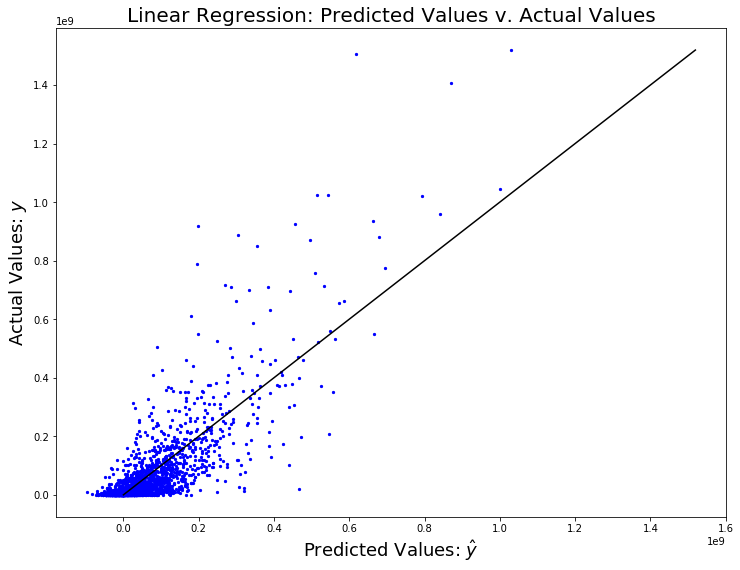

In [144]:
# Determing the predicitive v. actual values for Linear Regression
plot_pred_values_vs_actual_values(model_name = "Linear Regression", 
                                  preds_train = lr_preds_train)

Finally, we should explore the model's coefficients.

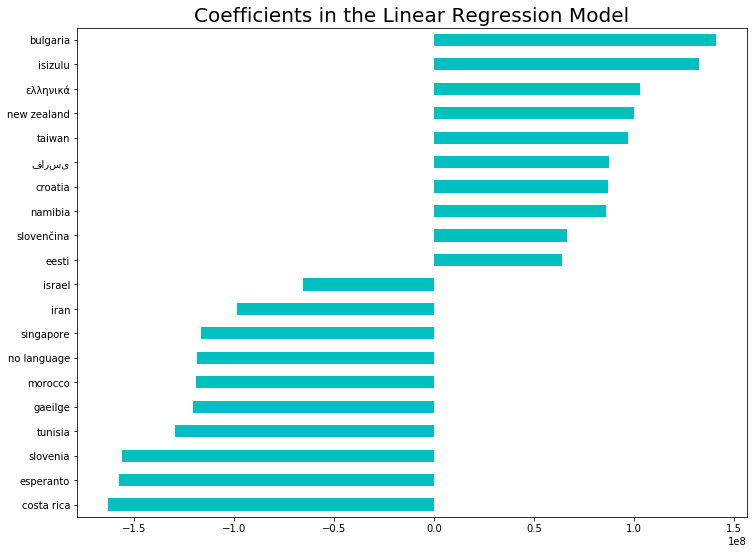

In [145]:
# Visualizing exploring Linear Regression Coefficients
# Getting the coefficients
# Source: Boom D.
coefficients = pd.Series(lr.coef_, 
                         index = X_train.columns)

# Getting the top and bottom 10 coefficients
coefficients_variations = pd.concat([coefficients.sort_values().head(10), 
                                     coefficients.sort_values().tail(10)])

# Figure size
plt.figure(figsize=(12,9))
# Ploting coefficients_variations                             
coefficients_variations.plot(kind = "barh", color = 'c')
    
# Title                              
plt.title("Coefficients in the Linear Regression Model", fontsize = 20);

**Insights:**

We need to make our model more efficient, we will need to regularize our data. We will use the Standard Scaler to transform our data to regularize data.

In [146]:
#Fit & transform the Standard Scaler 
Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

Now that our data is regularize, we can work with regresssion models that use regularize data. Lets begin with Ridge Regression. 

### Ridge Regression

[Back to Top](#Table-of-Contents:) 

Ridge regression shrinks the coefficients and helps reduce the multicollinearity in the regression model. 

In [147]:
# Modeling Ridge
# Instantiate model
ridge_model = Ridge()

# Construct Grid Parameters
grid_params_ridge = {'alpha': [0.01, 0.1, 1, 10, 100],
                     'tol': [.0001,0.001, 0.01, .1, 1]}

# Perform Grid Search
gs = GridSearchCV(ridge_model, 
                  param_grid = grid_params_ridge, 
                  cv = 5, 
                  scoring = 'r2')
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(gs, Z_train , y_train, cv = 5).mean()}")
print('---------------')
    
# Fit model
gs.fit(Z_train, y_train)
    
# Get best params
print(f"Best model's estimator: {gs.best_score_}")
print('---------------')
best_params = gs.best_params_
ridge_model_estimator = gs.best_estimator_
    
# Get r2 scores
train_score = ridge_model_estimator.score(Z_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = ridge_model_estimator.score(Z_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
ridge_preds_train = gs.predict(Z_train)
ridge_preds_test = gs.predict(Z_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, ridge_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, ridge_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}') 

The model's cross vaildation score: 0.5283511881385314
---------------
Best model's estimator: 0.5283267660821285
---------------
Train R^2 score: 0.6387723827702043
Test R^2 score: 0.6022058315845491
---------------
Train RMSE: 85120644.56423329
Test RMSE: 86915069.05509979


**Insights:**

Next, lets visually determine how close our model is to the actual values. 

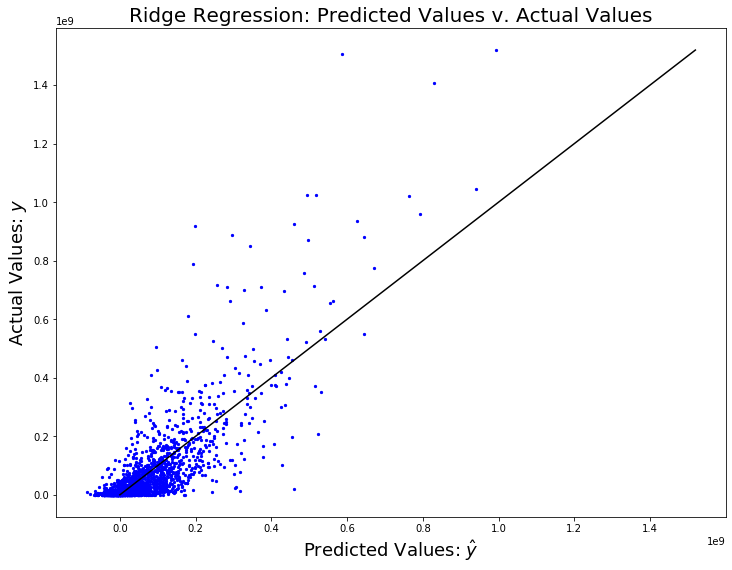

In [148]:
# Determing the predicitive v. actual values for Ridge Regression
plot_pred_values_vs_actual_values(model_name = "Ridge Regression", 
                                  preds_train = ridge_preds_train)

Finally, we should explore the model's coefficients.

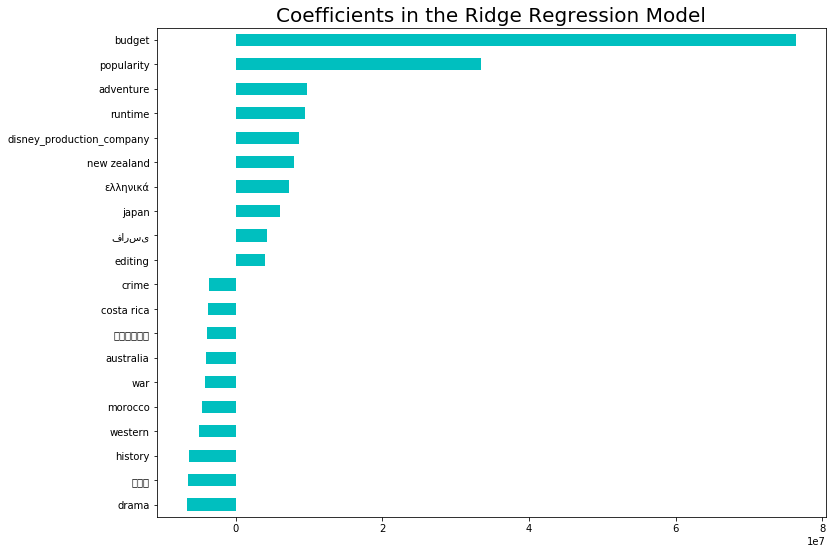

In [149]:
# Visualizing exploring Ridge Regression Coefficients
# Getting the coefficients
# Source: Boom D.
coefficients = pd.Series(ridge_model_estimator.coef_, 
                         index = X_train.columns)
# Getting the top and bottom 10 coefficients
coefficients_variations = pd.concat([coefficients.sort_values().head(10), 
                                     coefficients.sort_values().tail(10)])
# Figure size
plt.figure(figsize=(12,9))
# Ploting coefficients_variations                             
coefficients_variations.plot(kind = "barh", color = 'c')
    
# Title                              
plt.title("Coefficients in the Ridge Regression Model", fontsize = 20);

**Insights:**

Next, we will be modeling the lasso regression model.

### Lasso Regression

[Back to Top](#Table-of-Contents:) 

Lasso is actually an acronym: L is for least, A is for abolute, S is for shrinkage, S is for selection, and O is for operator. In other words, the lasso regression helps us with reducing over-fitting but it can also help us in feature selection because some of our features will be eliminated. 

In [150]:
# Modeling Lasso
# Instantiate model
lasso_model = Lasso()

# Construct Grid Parameters
grid_params_lasso = {'alpha': [150, 200],
                     'tol': [0.0001, 0.001, .01, .1]}

# Perform Grid Search
gs = GridSearchCV(lasso_model, 
                  param_grid = grid_params_lasso, 
                  cv = 5, 
                  scoring = 'r2')
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(gs, Z_train , y_train, cv = 5).mean()}")
print('---------------')
    
# Fit model
gs.fit(Z_train, y_train)
    
# Get best params
print(f"Best model's estimator: {gs.best_score_}")
print('---------------')
best_params = gs.best_params_
lasso_model_estimator = gs.best_estimator_
    
# Get r2 scores
train_score = lasso_model_estimator.score(Z_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = lasso_model_estimator.score(Z_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
lasso_preds_train = gs.predict(Z_train)
lasso_preds_test = gs.predict(Z_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, lasso_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, lasso_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}') 

The model's cross vaildation score: 0.5108635734116718
---------------
Best model's estimator: 0.5108363416869577
---------------
Train R^2 score: 0.6405540100506103
Test R^2 score: 0.5975056600422892
---------------
Train RMSE: 84910471.37729086
Test RMSE: 87427037.46743715


**Insights:**

Next, lets visually determine how close our model is to the actual values. 

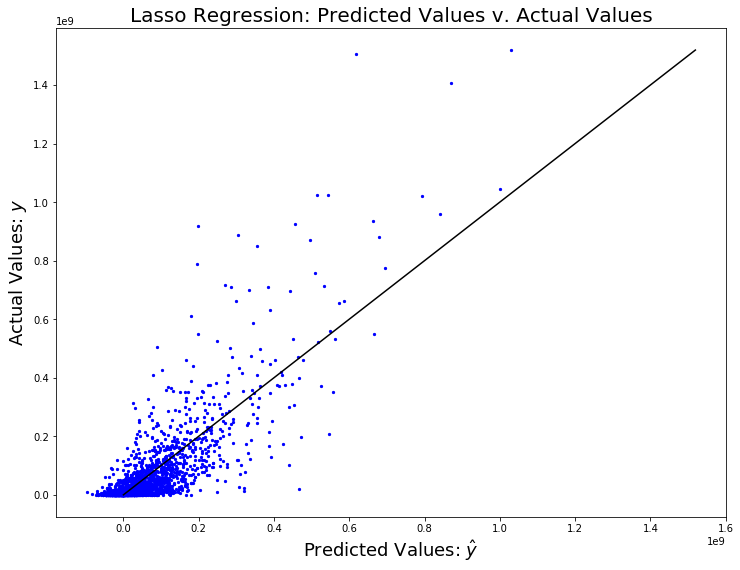

In [151]:
# Determing the predicitive v. actual values for Lasso Regression
plot_pred_values_vs_actual_values(model_name = "Lasso Regression", 
                                  preds_train = lasso_preds_train)

Finally, we should explore the model's coefficients.

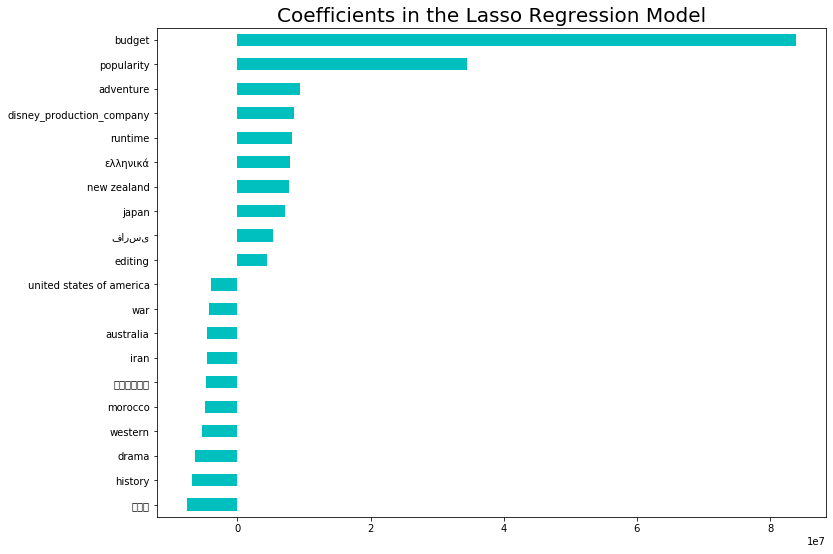

In [152]:
# Visualizing exploring Lasso Regression Coefficients
# Getting the coefficients
# Source: Boom D.
coefficients = pd.Series(lasso_model_estimator.coef_, 
                         index = X_train.columns)
# Getting the top and bottom 10 coefficients
coefficients_variations = pd.concat([coefficients.sort_values().head(10), 
                                     coefficients.sort_values().tail(10)])
# Figure size
plt.figure(figsize=(12,9))
# Ploting coefficients_variations                             
coefficients_variations.plot(kind = "barh", color = 'c')
    
# Title                              
plt.title("Coefficients in the Lasso Regression Model", fontsize = 20);

**Insights:**

Next, we will be modeling the DecisionTreeRegressor model.

### DecisionTreeRegressor

[Back to Top](#Table-of-Contents:) 

Decision trees operate in a fashion that's pretty similar to 20 Questions.

In [153]:
# Modeling Decision Tree
# Instantiate model
dt = DecisionTreeRegressor(random_state = 42)
    
# Construct Grid Parameters
grid_params_dt = {'max_depth': [None, 4, 6, 8, 10],
                  'max_features': [None, 10, 20]}

# Perform Grid Search
gs = GridSearchCV(dt, 
                  param_grid = grid_params_dt, 
                  cv = 5, 
                  scoring = 'r2')
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(gs, Z_train , y_train, cv = 5).mean()}")
print('---------------')
    
# Fit model
gs.fit(Z_train, y_train)
    
# Get best params
print(f"Best model's estimator: {gs.best_score_}")
print('---------------')
best_params = gs.best_params_
dt_model_estimator = gs.best_estimator_
    
# Get r2 scores
train_score = dt_model_estimator.score(Z_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = dt_model_estimator.score(Z_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
dt_preds_train = gs.predict(Z_train)
dt_preds_test = gs.predict(Z_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, dt_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, dt_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}') 

The model's cross vaildation score: 0.40831790023025033
---------------
Best model's estimator: 0.40835732658911633
---------------
Train R^2 score: 0.6946780538815692
Test R^2 score: 0.5088286161084685
---------------
Train RMSE: 78257044.3735374
Test RMSE: 96578932.70729111


**Insights:**

### BaggingRegressor

[Back to Top](#Table-of-Contents:) 

Decision trees have limitations. In particular, trees that are grown very deep tend to learn highly irregular patterns. Thus, we will be using a Bagged Decision Tree Model. BDT fixes this problem by exposing different trees to different sub-samples of the training set.

In [154]:
# Modeling Bagged Decision Tree
# Instantiate model
bg = BaggingRegressor(random_state = 42)
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(bg, X_train , y_train, cv = 5).mean()}")
print('---------------')

# Fit model
bg.fit(X_train, y_train)

# Get r2 scores
train_score = bg.score(X_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = bg.score(X_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
bg_preds_train = bg.predict(X_train)
bg_preds_test = bg.predict(X_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, bg_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, bg_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}')

The model's cross vaildation score: 0.5705566334375927
---------------
Train R^2 score: 0.927687959325337
Test R^2 score: 0.624254200885257
---------------
Train RMSE: 38084629.87308593
Test RMSE: 84472031.80416177


**Insights:**

### RandomForestRegressor

[Back to Top](#Table-of-Contents:) 

Random Forest are very similar to Bagged Decision Trees. Yet, the difference is only a subset of features are selected at random out of the total. In other words, the best split feature from the subset is used to split each node in a tree.

In [155]:
# Modeling Bagged Decision Tree
# Instantiate model
rf = RandomForestRegressor(random_state = 42)
    
# Construct Grid Parameters
grid_params_rf = {'n_estimators': [100, 150],
                  'max_depth': [None, 4, 6],
                  'bootstrap': [True, False]}

# Perform Grid Search
gs = GridSearchCV(rf, 
                  param_grid = grid_params_rf, 
                  cv = 5, 
                  scoring = 'r2')
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(gs, Z_train , y_train, cv = 5).mean()}")
print('---------------')
    
# Fit model
gs.fit(Z_train, y_train)
    
# Get best params
print(f"Best model's estimator: {gs.best_score_}")
print('---------------')
best_params = gs.best_params_
rf_model_estimator = gs.best_estimator_
    
# Get r2 scores
train_score = rf_model_estimator.score(Z_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = rf_model_estimator.score(Z_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
rf_preds_train = gs.predict(Z_train)
rf_preds_test = gs.predict(Z_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, rf_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, rf_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}') 

The model's cross vaildation score: 0.5992648940734606
---------------
Best model's estimator: 0.6100622736077074
---------------
Train R^2 score: 0.9450863262951474
Test R^2 score: 0.6657668410758601
---------------
Train RMSE: 33188274.984393492
Test RMSE: 79669233.76580952


**Insights:**

We will move onto boosting models. Boosting is another ensemble method with a different approach to bagging. Boosting takes a weak base learner and tries to make it a strong learner by retraining it on the misclassified samples. 

### AdaBoostRegressor

[Back to Top](#Table-of-Contents:) 

AdaBoost is the original boosting algorithm. AdaBoost is about reweighting the preceding model's errors in subsequent iterations.

In [156]:
# Modeling AdaBoost
# Instantiate model
ada = AdaBoostRegressor(random_state = 42)
    
# Construct Grid Parameters
grid_params_ada = {'n_estimators': [60, 80, 100], 
                  'learning_rate': [.9, .7, 1]}

# Perform Grid Search
gs = GridSearchCV(ada, 
                  param_grid = grid_params_ada, 
                  cv = 5, 
                  scoring = 'r2')
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(gs, Z_train , y_train, cv = 5).mean()}")
print('---------------')
    
# Fit model
gs.fit(Z_train, y_train)
    
# Get best params
print(f"Best model's estimator: {gs.best_score_}")
print('---------------')
best_params = gs.best_params_
ada_model_estimator = gs.best_estimator_
    
# Get r2 scores
train_score = ada_model_estimator.score(Z_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = ada_model_estimator.score(Z_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
ada_preds_train = gs.predict(Z_train)
ada_preds_test = gs.predict(Z_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, ada_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, ada_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}') 

The model's cross vaildation score: 0.293881848680785
---------------
Best model's estimator: 0.2938376683591825
---------------
Train R^2 score: 0.45550289656633647
Test R^2 score: 0.31565358824677714
---------------
Train RMSE: 104506238.70831701
Test RMSE: 113999742.58896402


**Insights:**

### GradientBoostingRegressor

[Back to Top](#Table-of-Contents:) 

Gradient boosting is about fitting subsequent models to the residuals of the last model.

In [157]:
# Modeling Gradient Boosting
# Instantiate model
gb = GradientBoostingRegressor(random_state = 42)
    
# Construct Grid Parameters
grid_params_gb = {'max_depth': [3, 4, 5],
                  'learning_rate': [0.1, 1],
                  'n_estimators': [100, 200],
                  'alpha': [0.2, 0.9]
                 }

# Perform Grid Search
gs = GridSearchCV(gb, 
                  param_grid = grid_params_gb, 
                  cv = 5, 
                  scoring = 'r2')
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(gs, Z_train , y_train, cv = 5).mean()}")
print('---------------')
    
# Fit model
gs.fit(Z_train, y_train)
    
# Get best params
print(f"Best model's estimator: {gs.best_score_}")
print('---------------')
best_params = gs.best_params_
gb_model_estimator = gs.best_estimator_
    
# Get r2 scores
train_score = gb_model_estimator.score(Z_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = gb_model_estimator.score(Z_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
gb_preds_train = gs.predict(Z_train)
gb_preds_test = gs.predict(Z_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, gb_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, gb_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}') 

The model's cross vaildation score: 0.6050139043619392
---------------
Best model's estimator: 0.6035950535197531
---------------
Train R^2 score: 0.8307822181205091
Test R^2 score: 0.6693084316815339
---------------
Train RMSE: 58259590.72849194
Test RMSE: 79246015.3757158


**Insights:**

### SVR

[Back to Top](#Table-of-Contents:) 

The most general form of Support Vector Regression (SVR) to handle non-linear separation in current dimensions.

In [158]:
# Modeling Support Vector Regression
# Instantiate model
svm = SVR(kernel = 'linear')
    
# Construct Grid Parameters
grid_params_svm = {'tol': [0.0001, 0.001, 0.01, 1],
                  'C': [1.0, 10, 100, 1000],
                  'epsilon': [0.1, 0.5]}

# Perform Grid Search
gs = GridSearchCV(svm, 
                  param_grid = grid_params_svm, 
                  cv = 5, 
                  scoring = 'r2')
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(gs, Z_train , y_train, cv = 5).mean()}")
print('---------------')
    
# Fit model
gs.fit(Z_train, y_train)
    
# Get best params
print(f"Best model's estimator: {gs.best_score_}")
print('---------------')
best_params = gs.best_params_
svm_model_estimator = gs.best_estimator_
    
# Get r2 scores
train_score = svm_model_estimator.score(Z_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = svm_model_estimator.score(Z_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
svm_preds_train = gs.predict(Z_train)
svm_preds_test = gs.predict(Z_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, svm_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, svm_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}') 

The model's cross vaildation score: -0.11288916155597377
---------------
Best model's estimator: -0.11289936728057501
---------------
Train R^2 score: -0.10112601391160037
Test R^2 score: -0.10261637067673758
---------------
Train RMSE: 148615101.30180985
Test RMSE: 144703185.42897668


**Insights:**

### VotingRegressor

[Back to Top](#Table-of-Contents:) 

We can combine multiple models at once.

In [159]:
# Modeling Support Vector Regression
# Instantiate model
vote = VotingRegressor([
    ('tree', BaggingRegressor(random_state = 42)),
    ('rf', RandomForestRegressor(random_state = 42)),
    ('gb', GradientBoostingRegressor(random_state = 42))
])
        
# Construct Grid Parameters
vote_params = {'tree__n_estimators': [10, 11],
               'rf__n_estimators': [100, 200, 300],
               'gb__n_estimators': [100, 200, 300]}

# Perform Grid Search
gs = GridSearchCV(vote, 
                  param_grid = vote_params, 
                  cv = 5, 
                  scoring = 'r2')
    
# Cross Validation Score
print(f"The model's cross vaildation score: {cross_val_score(gs, Z_train , y_train, cv = 5).mean()}")
print('---------------')
    
# Fit model
gs.fit(Z_train, y_train)
    
# Get best params
print(f"Best model's estimator: {gs.best_score_}")
print('---------------')
best_params = gs.best_params_
vote_model_estimator = gs.best_estimator_
    
# Get r2 scores
train_score = vote_model_estimator.score(Z_train, y_train)
print(f'Train R^2 score: {train_score}')
test_score = vote_model_estimator.score(Z_test, y_test)
print(f'Test R^2 score: {test_score}')
print('---------------')
    
# Get predictions
vote_preds_train = gs.predict(Z_train)
vote_preds_test = gs.predict(Z_test)
    
# Get RMSE
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, vote_preds_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, vote_preds_test))
print(f'Train RMSE: {rmse_train}')
print(f'Test RMSE: {rmse_test}') 

The model's cross vaildation score: 0.6131332543111883
---------------
Best model's estimator: 0.6180830257821609
---------------
Train R^2 score: 0.9389465872060102
Test R^2 score: 0.6667790570710999
---------------
Train RMSE: 34994468.60525269
Test RMSE: 79548504.24047445


**Insights:**

## Conclusions and Recommendations

[Back to Top](#Table-of-Contents:) 

|Model|Training $R^2$ Score|Testing $R^2$ Score|RMSE Training|RMSE Testing|
|---|---|---|---|---|


Recommendations:
- Tune hyperparameters more
- Do more feature enigeering

## Sources

[Back to Top](#Table-of-Contents:) 

- [Domestic Movie Theatrical Market Summary 1995 to 2020](https://www.the-numbers.com/market/)
- [TMDB Box Office Prediction](https://www.kaggle.com/c/tmdb-box-office-prediction/data) 
- [The Movie Database](https://www.themoviedb.org/)
- [Movies: What determines the success of a movie (by box office revenue)?](https://www.quora.com/Movies-What-determines-the-success-of-a-movie-by-box-office-revenue)
- [Study explores what really makes a movie successful](https://phys.org/news/2017-11-explores-movie-successful.html)
- [IMDB website](https://www.imdb.com/)
- [Boom or Bust? Factors that Influence Box Office Revenue](https://medium.com/@nealsivadas/boom-or-bust-factors-that-influence-box-office-revenue-c8e4442d141f)
- [Google Web Interface and Search Language Codes](https://sites.google.com/site/tomihasa/google-language-codes)
- [EVERY COMPANY DISNEY OWNS: A MAP OF DISNEY'S WORLDWIDE ASSETS](https://www.titlemax.com/discovery-center/money-finance/companies-disney-owns-worldwide/)
- [List of assets owned by 21st Century Fox](https://en.wikipedia.org/wiki/List_of_assets_owned_by_21st_Century_Fox)
- [List of assets owned by WarnerMedia](https://en.wikipedia.org/wiki/List_of_assets_owned_by_WarnerMedia)
- [List of assets owned by NBCUniversal](https://en.wikipedia.org/wiki/List_of_assets_owned_by_NBCUniversal)
- [Sony Pictures Entertainment Motion Picture Group](https://en.wikipedia.org/wiki/Sony_Pictures_Entertainment_Motion_Picture_Group)
- [Paramount Pictures](https://www.wikiwand.com/en/Paramount_Pictures)
- [Movie Keywords From The Numbers](https://www.the-numbers.com/movies/keywords#keyword_overview=od1)
- [The average movie length](https://www.google.com/search?q=the+average+movie+length&rlz=1C5CHFA_enUS877US877&oq=the+average+movie&aqs=chrome.1.69i57j0l7.7070j0j7&sourceid=chrome&ie=UTF-8)